In [12]:
import pandas as pd
import os

# Assuming results is a list of DataFrames
results = []
for filename in os.listdir('results'):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join('results', filename))
        results.append(df)
combined_df = pd.concat(results, ignore_index=True)
length_of_combined_df = len(combined_df)

print("Length of the combined DataFrame:", length_of_combined_df)
combined_df.to_csv('combined_results.csv', index=False)

import seaborn as sns

import matplotlib.pyplot as plt

def warmstartconv(str):
    return 'warmstart' if str else 'regstart'
# Calculate the percent of optimal solution
combined_df['percent_optimal'] = (combined_df['quantum_obj_value'] / combined_df['classic_value']) * 100

#combined_df['identifier'] = combined_df['depth'] + ' '+ combined_df['warm_start'].apply(lambda x: warmstartconv(x)) 

Length of the combined DataFrame: 4000


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_8808\4175184846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hue'] = filtered_df['depth'].astype(str) + ' ' + filtered_df['errors'].replace({False: 'Ideal', True: 'Noisy'}).astype(str)


1600


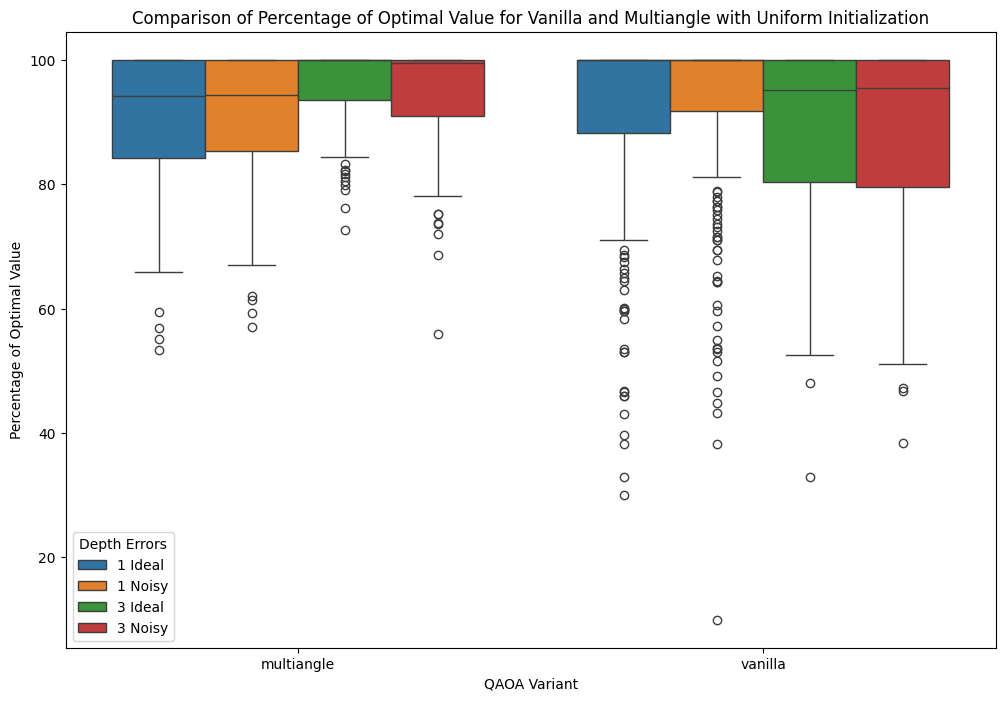

In [14]:
# Filter the DataFrame for the required conditions
filtered_df = combined_df[(combined_df['param_initialization'] == 'uniform') & (combined_df['qaoa_variant'].isin(['vanilla', 'multiangle']))]
filtered_df['hue'] = filtered_df['depth'].astype(str) + ' ' + filtered_df['errors'].replace({False: 'Ideal', True: 'Noisy'}).astype(str)
print(len(filtered_df))
# Plot the data
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='qaoa_variant', y='percent_optimal', hue='hue')
plt.xlabel('QAOA Variant')
plt.ylabel('Percentage of Optimal Value')
plt.title('Comparison of Percentage of Optimal Value for Vanilla and Multiangle with Uniform Initialization')
plt.legend(title='Depth Errors')
plt.show()

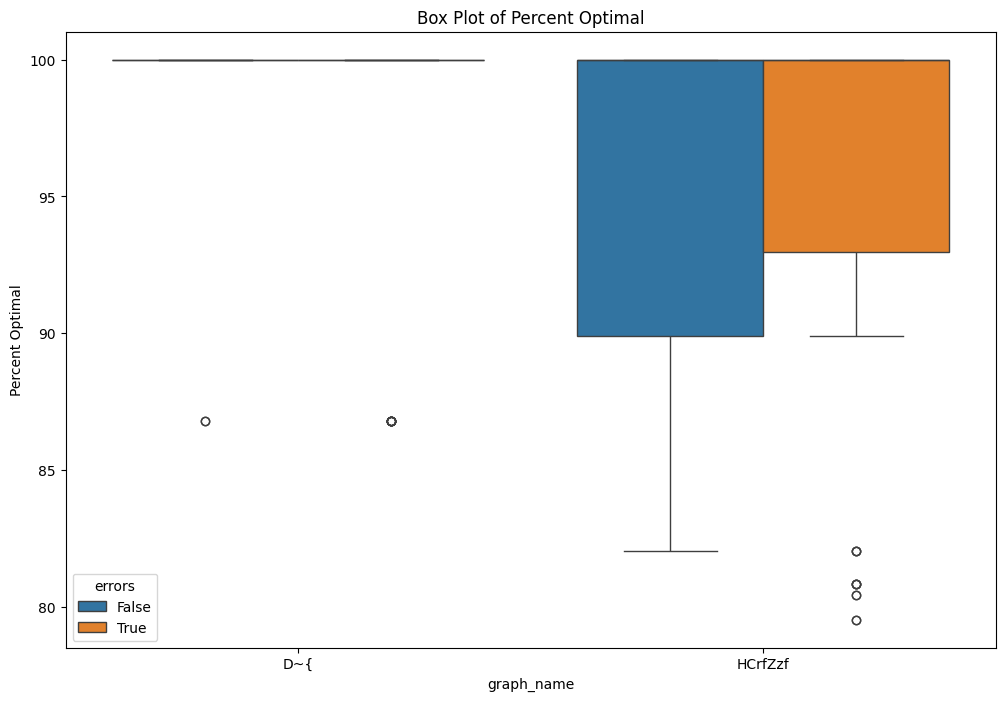

In [20]:
# Load the CSV file
ma_singlegraph_df = pd.read_csv('ma_singlegraph.csv')

ma_singlegraph_df['percent_optimal'] = (ma_singlegraph_df['quantum_obj_value'] / ma_singlegraph_df['classic_value']) * 100

# Plot the box plot of percent optimal
plt.figure(figsize=(12, 8))
sns.boxplot(data=ma_singlegraph_df,x='graph_name', y='percent_optimal',hue='errors')
plt.ylabel('Percent Optimal')
plt.title('Box Plot of Percent Optimal')
plt.show()

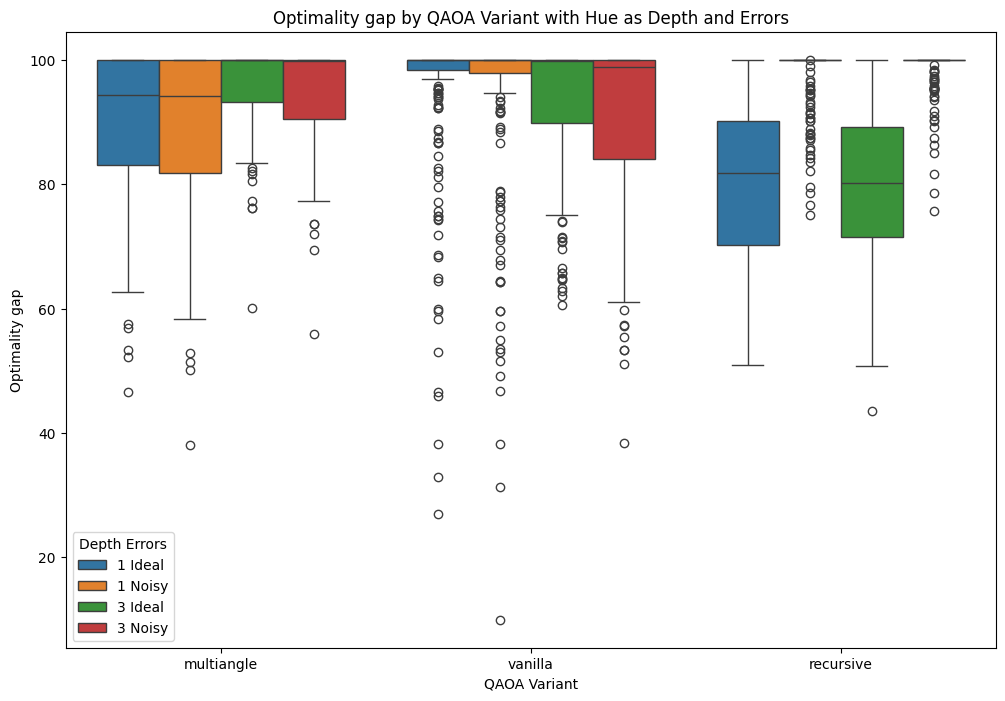

In [45]:
# Create a new column for hue
combined_df['hue'] = combined_df['depth'].astype(str) + ' ' + combined_df['errors'].replace({False: 'Ideal', True: 'Noisy'}).astype(str)
combined_df = combined_df[combined_df['warm_start']==False]
# Plot the data
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df, x='qaoa_variant', y='percent_optimal', hue='hue')
plt.xlabel('QAOA Variant')
plt.ylabel('Optimality gap')
plt.title('Optimality gap by QAOA Variant with Hue as Depth and Errors')
plt.legend(title='Depth Errors')
plt.show()

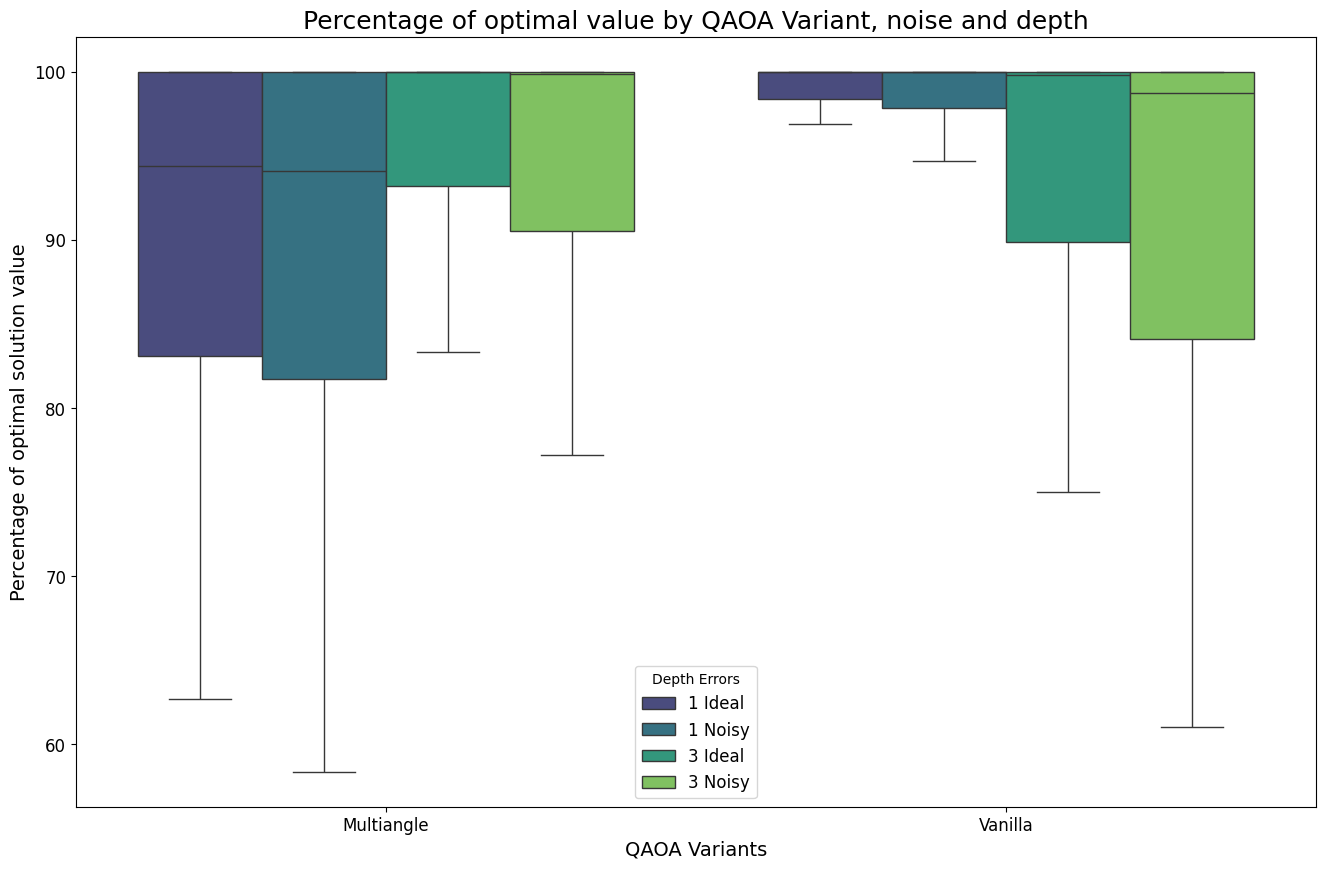

In [41]:
# Example boxplot with enhanced clarity
combined_df['qaoa_variant'] = combined_df['qaoa_variant'].str.capitalize()

plt.figure(figsize=(16, 10))
combined_df = combined_df[combined_df['qaoa_variant'] != 'Recursive']
sns.boxplot(data=combined_df, x='qaoa_variant', y='percent_optimal', hue='hue', showfliers=False, palette='viridis')
plt.title("Percentage of optimal value by QAOA Variant, noise and depth", fontsize=18)
plt.xlabel('QAOA Variants', fontsize=14)
plt.ylabel('Percentage of optimal solution value', fontsize=14)
plt.legend(title='Depth Errors', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_18716\2868147470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['qaoa_variant'] = filtered_df['qaoa_variant'].str.capitalize()


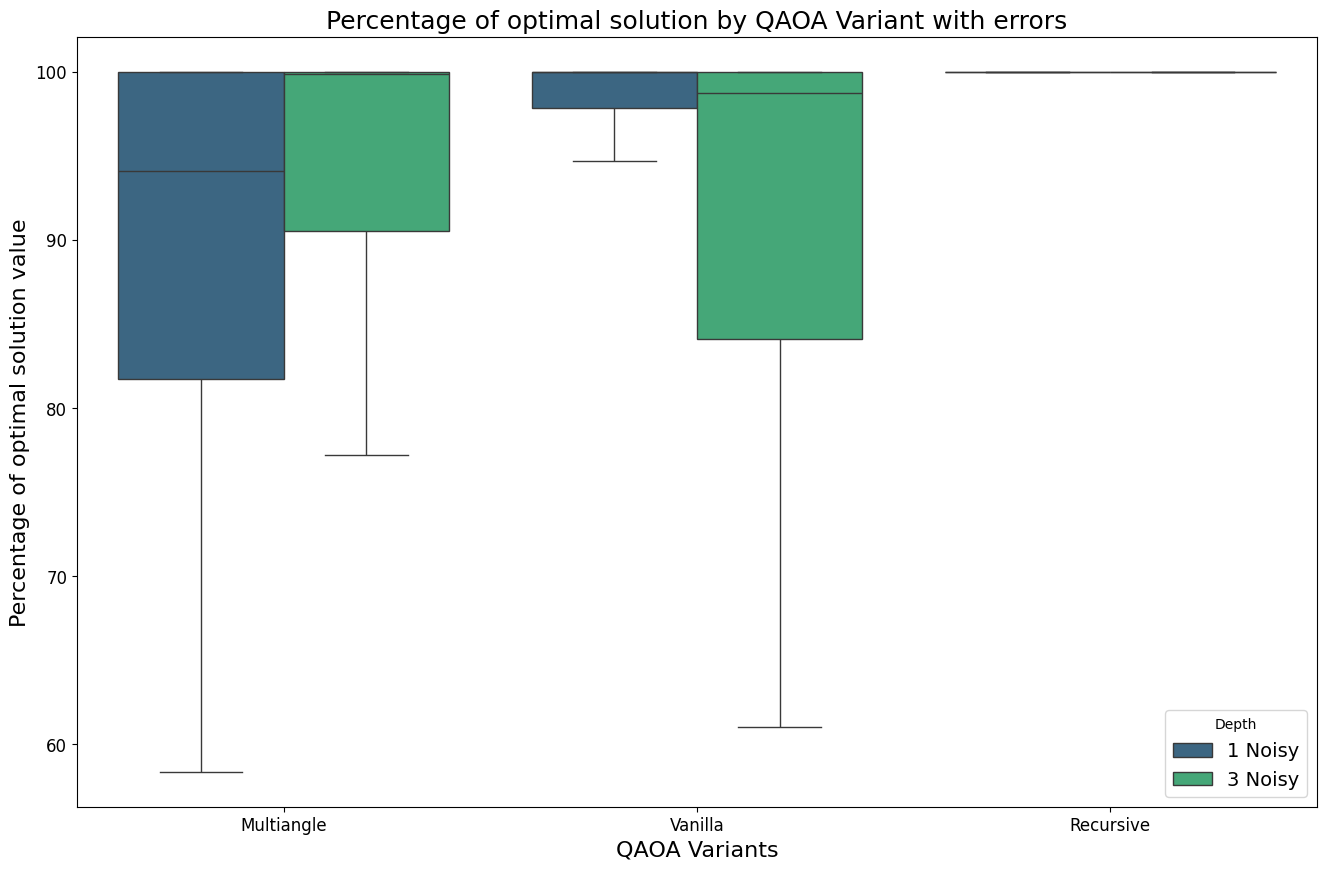

  QAOA Variant  Depth  Mean Percent Optimal
0   Multiangle      1             89.199675
1   Multiangle      3             94.909701
2    Recursive      1             97.999021
3    Recursive      3             98.778450
4      Vanilla      1             93.634337
5      Vanilla      3             90.678396


In [46]:
# Filter the DataFrame for errors = True
filtered_df = combined_df[combined_df['errors'] == True]
filtered_df['qaoa_variant'] = filtered_df['qaoa_variant'].str.capitalize()
# Plot the data
plt.figure(figsize=(16, 10))
sns.boxplot(data=filtered_df, x='qaoa_variant', y='percent_optimal', hue='hue', showfliers=False, palette='viridis')
plt.title("Percentage of optimal solution by QAOA Variant with errors", fontsize=18)
plt.xlabel('QAOA Variants', fontsize=16)
plt.ylabel('Percentage of optimal solution value', fontsize=16)
plt.legend(title='Depth', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the mean percentage of optimal solution by depth
mean_percent_optimal_by_depth = filtered_df.groupby(['qaoa_variant', 'depth'])['percent_optimal'].mean().reset_index()

# Rename the columns for clarity
mean_percent_optimal_by_depth.columns = ['QAOA Variant', 'Depth', 'Mean Percent Optimal']

# Display the mean percentage of optimal solution by depth as a table
print(mean_percent_optimal_by_depth)



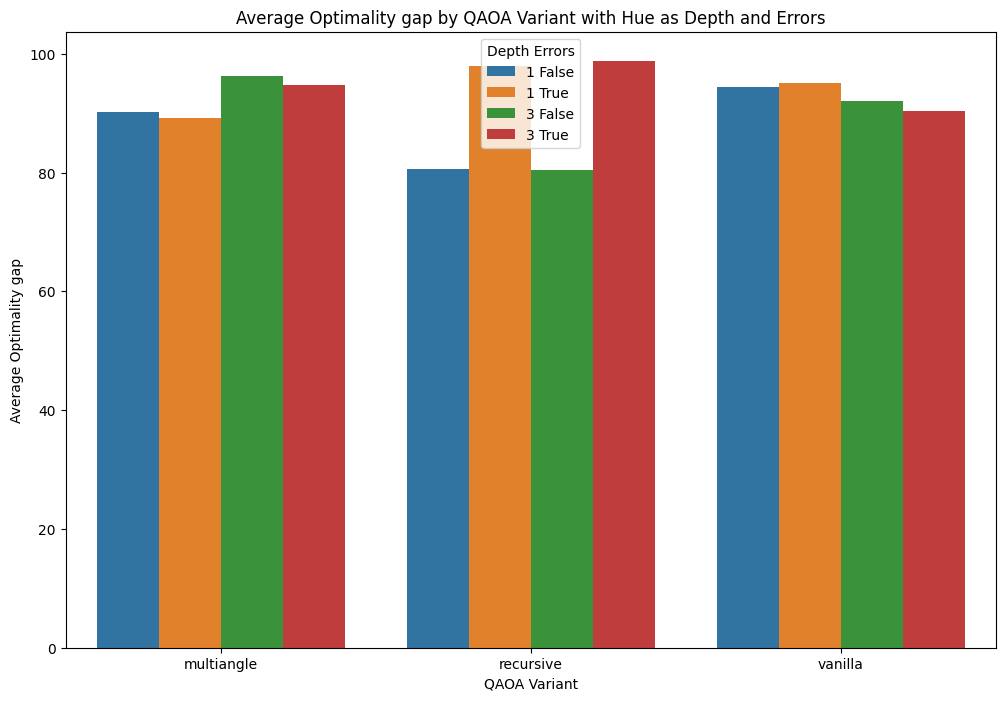

In [12]:
# Group by 'qaoa_variant' and 'hue' and calculate the mean of 'percent_optimal'
average_percent_optimal = combined_df.groupby(['qaoa_variant', 'hue'])['percent_optimal'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=average_percent_optimal, x='qaoa_variant', y='percent_optimal', hue='hue')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Optimality gap')
plt.title('Average Optimality gap by QAOA Variant with Hue as Depth and Errors')
plt.legend(title='Depth Errors')
plt.show()

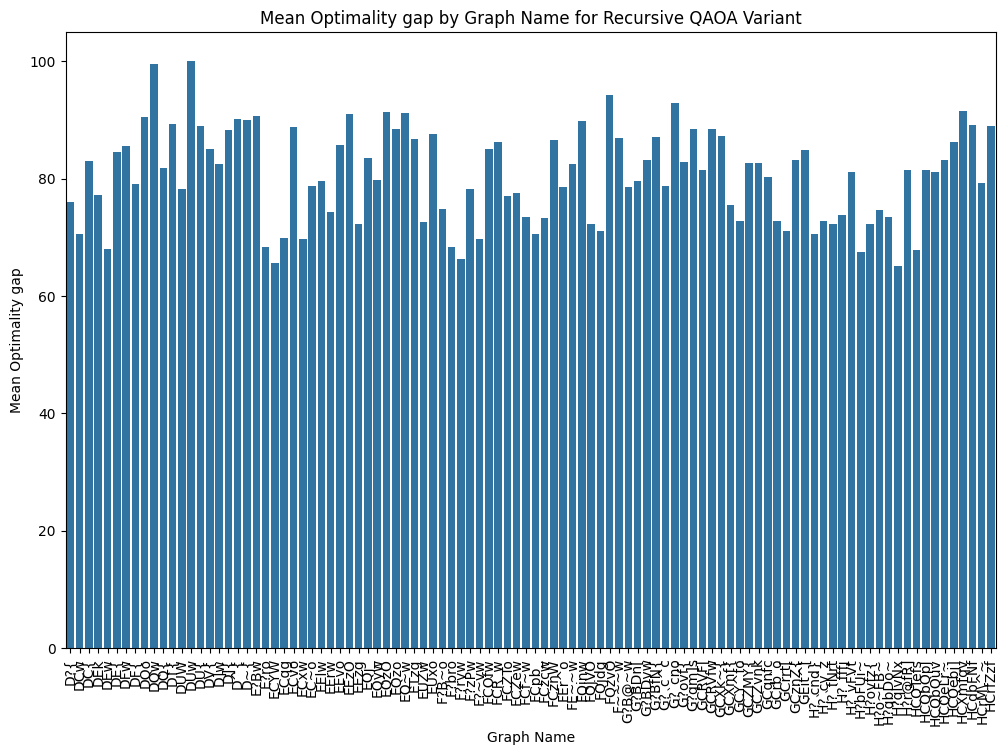

In [13]:
# Filter the DataFrame for the 'recursive' qaoa_variant
recursive_df = combined_df[(combined_df['qaoa_variant'] == 'recursive') & (combined_df['errors'] == False)]

# Group by 'graph_name' and calculate the mean of 'percent_optimal'
mean_percent_optimal = recursive_df.groupby('graph_name')['percent_optimal'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_percent_optimal, x='graph_name', y='percent_optimal')
plt.xlabel('Graph Name')
plt.ylabel('Mean Optimality gap')
plt.title('Mean Optimality gap by Graph Name for Recursive QAOA Variant')
plt.xticks(rotation=90)
plt.show()

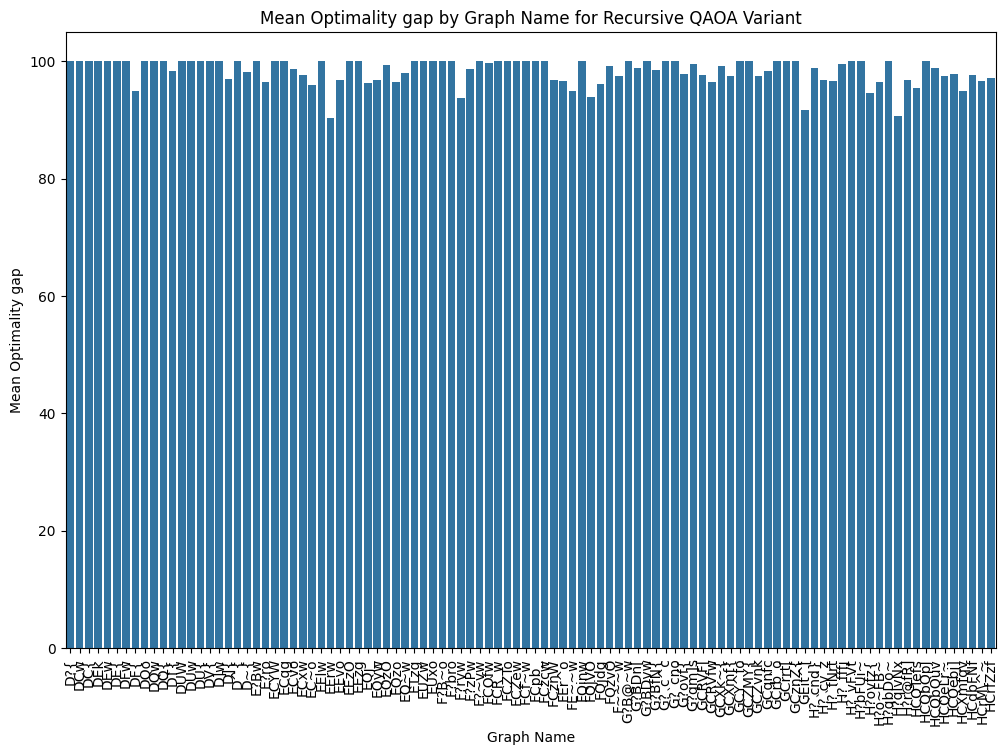

In [14]:
# Filter the DataFrame for the 'recursive' qaoa_variant
recursive_df = combined_df[(combined_df['qaoa_variant'] == 'recursive') & (combined_df['errors'] == True)]

# Group by 'graph_name' and calculate the mean of 'percent_optimal'
mean_percent_optimal = recursive_df.groupby('graph_name')['percent_optimal'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_percent_optimal, x='graph_name', y='percent_optimal')
plt.xlabel('Graph Name')
plt.ylabel('Mean Optimality gap')
plt.title('Mean Optimality gap by Graph Name for Recursive QAOA Variant')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Calculate the difference between the maximum and minimum Optimality gap values for each graph name
mean_percent_optimal_diff = mean_percent_optimal.groupby('graph_name')['percent_optimal'].agg(['max', 'min'])
mean_percent_optimal_diff['diff'] = mean_percent_optimal_diff['max'] - mean_percent_optimal_diff['min']

# Find the graph name with the largest difference
max_diff_graph_name = mean_percent_optimal_diff['diff'].idxmax()
max_diff_value = mean_percent_optimal_diff['diff'].max()

print(f"Graph name with the biggest difference in mean Optimality gap value: {max_diff_graph_name}")
print(f"Difference in mean Optimality gap value: {max_diff_value}")
# Calculate the mean Optimality gap value for errors = True
mean_percent_optimal_errors_true = combined_df[combined_df['errors'] == True].groupby('graph_name')['percent_optimal'].mean().reset_index()
mean_percent_optimal_errors_true.columns = ['graph_name', 'mean_percent_optimal_errors_true']

# Calculate the mean Optimality gap value for errors = False
mean_percent_optimal_errors_false = combined_df[combined_df['errors'] == False].groupby('graph_name')['percent_optimal'].mean().reset_index()
mean_percent_optimal_errors_false.columns = ['graph_name', 'mean_percent_optimal_errors_false']

# Merge the two DataFrames on 'graph_name'
mean_percent_optimal_comparison = pd.merge(mean_percent_optimal_errors_true, mean_percent_optimal_errors_false, on='graph_name')

# Calculate the difference between the mean Optimality gap values
mean_percent_optimal_comparison['difference'] = mean_percent_optimal_comparison['mean_percent_optimal_errors_true'] - mean_percent_optimal_comparison['mean_percent_optimal_errors_false']

# Display the comparison DataFrame
# Sort by the 'difference' column
mean_percent_optimal_comparison_sorted = mean_percent_optimal_comparison.sort_values(by='difference', ascending=False)

# Display the sorted comparison DataFrame
print(mean_percent_optimal_comparison_sorted.head(10))
# Print the top 10 graph names with the highest difference in mean Optimality gap value
top_10_graph_names = mean_percent_optimal_comparison_sorted.head(10)['graph_name']
print("Top 10 graph names with the highest difference in mean Optimality gap value:")
print(top_10_graph_names.tolist())

Graph name with the biggest difference in mean Optimality gap value: D?{
Difference in mean Optimality gap value: 0.0
   graph_name  mean_percent_optimal_errors_true  \
57      FQjdg                         92.212736   
42      F?rvw                         98.753922   
88    H?qbDo~                         97.136851   
51      FCzcw                         94.995052   
72     GCY^fo                         96.158541   
38       EUZw                         98.575191   
10        DQ{                         96.696205   
22       ECYW                         97.101887   
76     GCrb`o                         96.838668   
62     G?BDvw                         91.749505   

    mean_percent_optimal_errors_false  difference  
57                          81.159968   11.052768  
42                          88.968784    9.785138  
88                          87.614429    9.522422  
51                          85.526775    9.468277  
72                          86.989254    9.169287  
38      

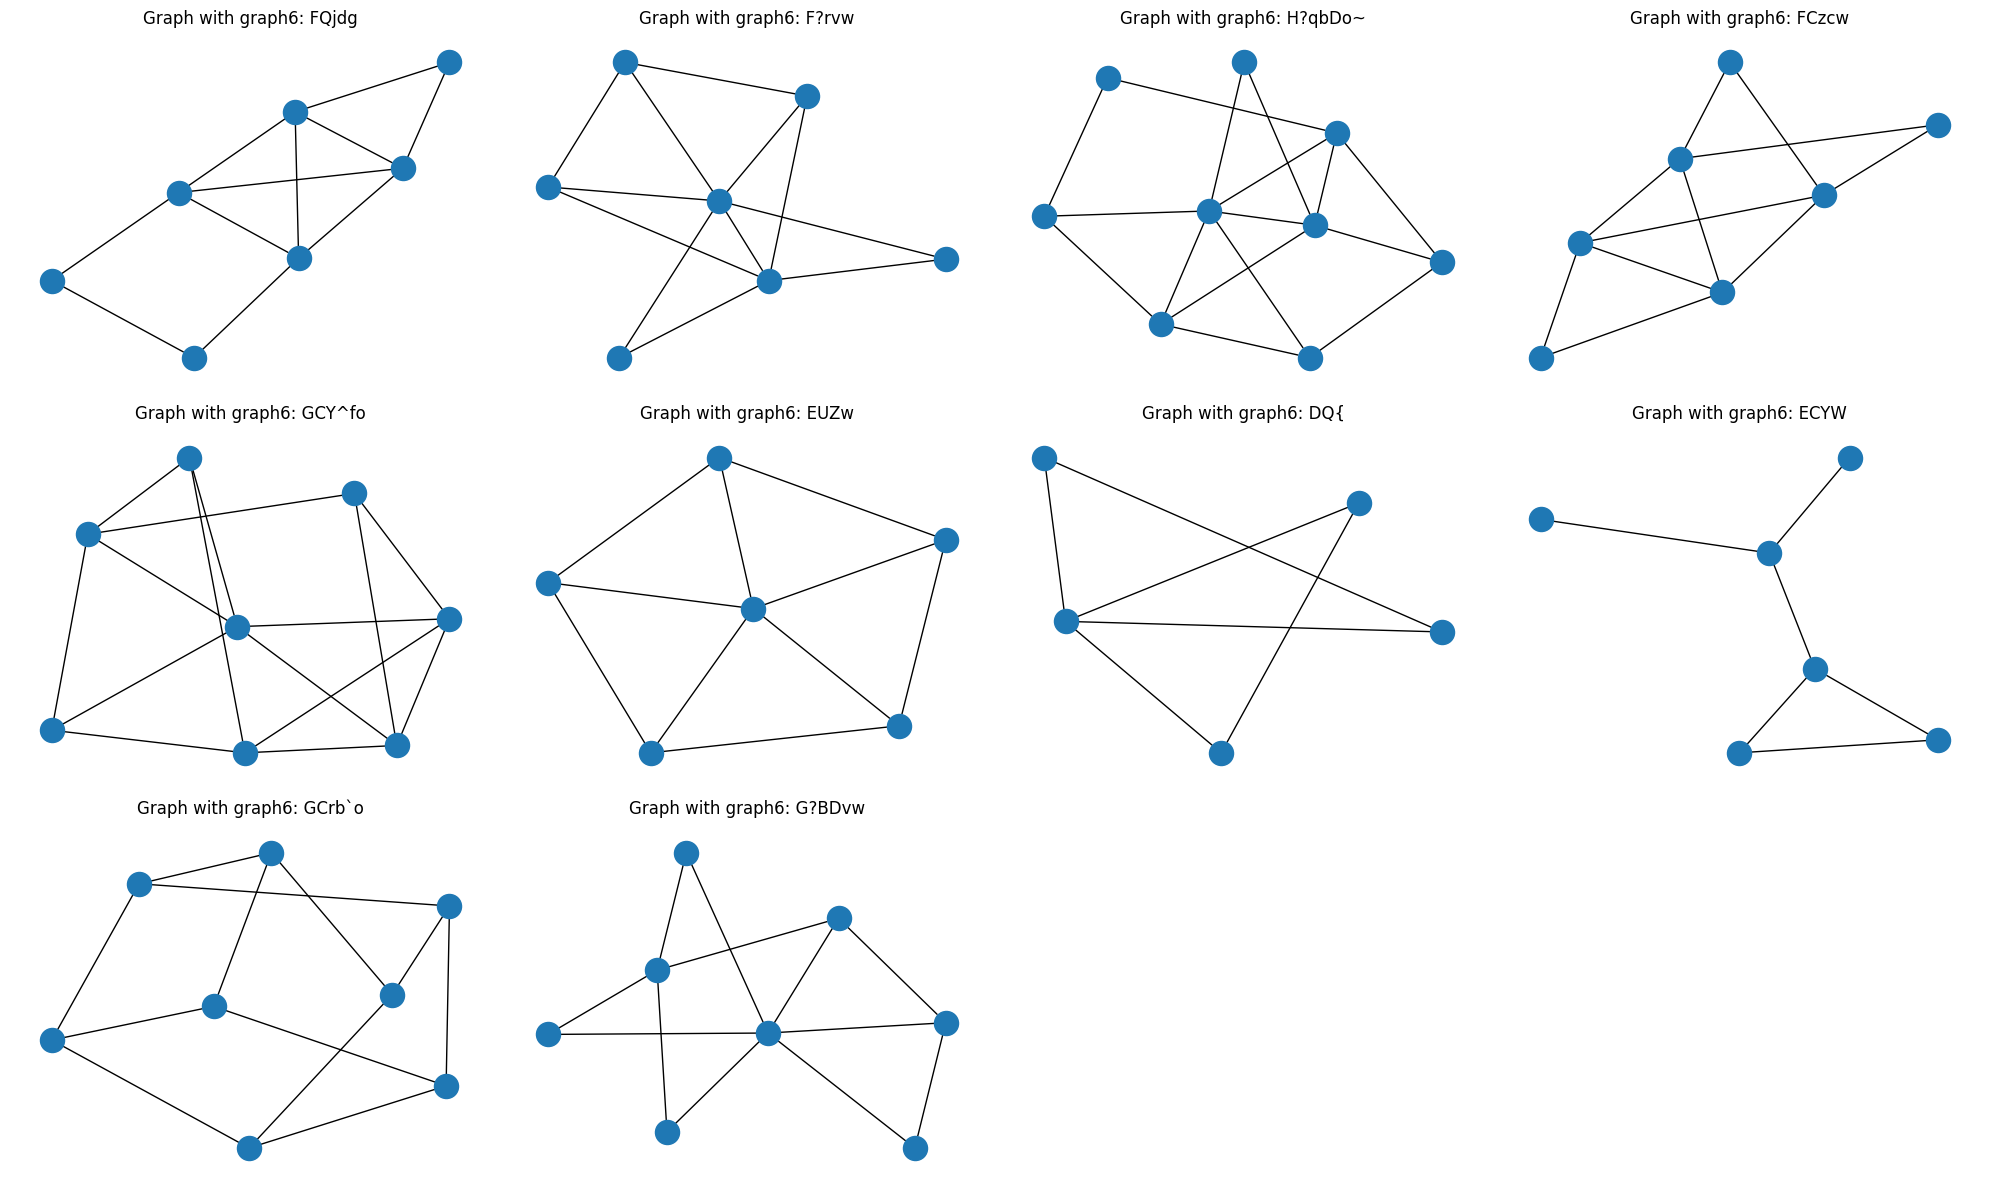

In [16]:
from MaxCutProblem import MaxCutProblem
problem = MaxCutProblem()
problem.draw_given_graphs(['FQjdg', 'F?rvw', 'H?qbDo~', 'FCzcw', 'GCY^fo', 'EUZw', 'DQ{', 'ECYW', 'GCrb`o', 'G?BDvw'])

2000


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_18716\3467753741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['qaoa_variant'] = filtered_df['qaoa_variant'].str.capitalize()


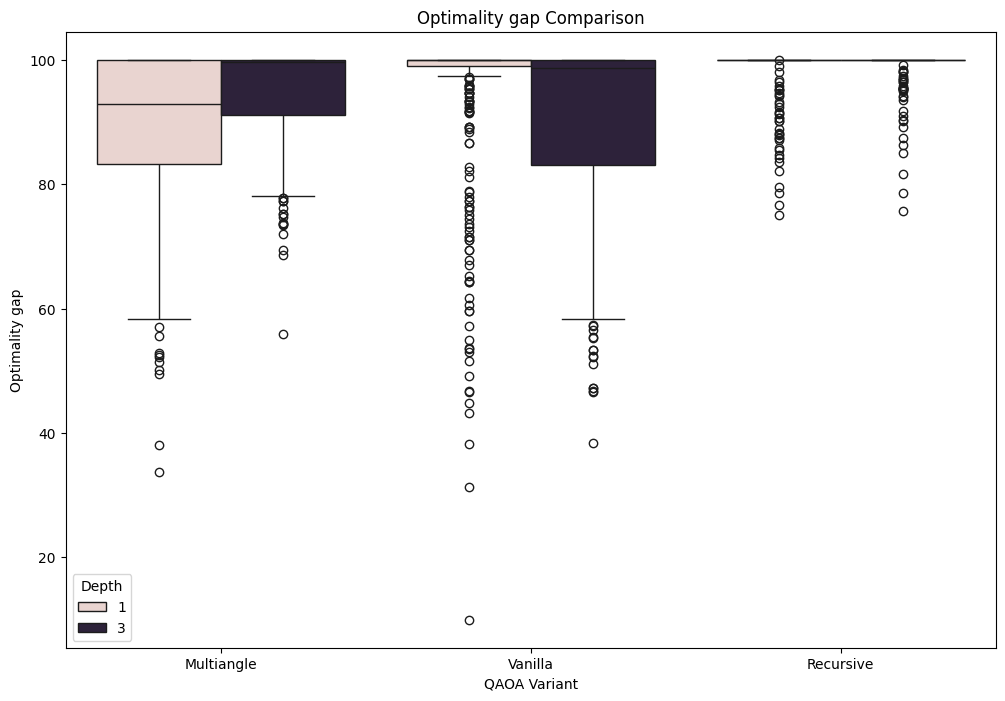

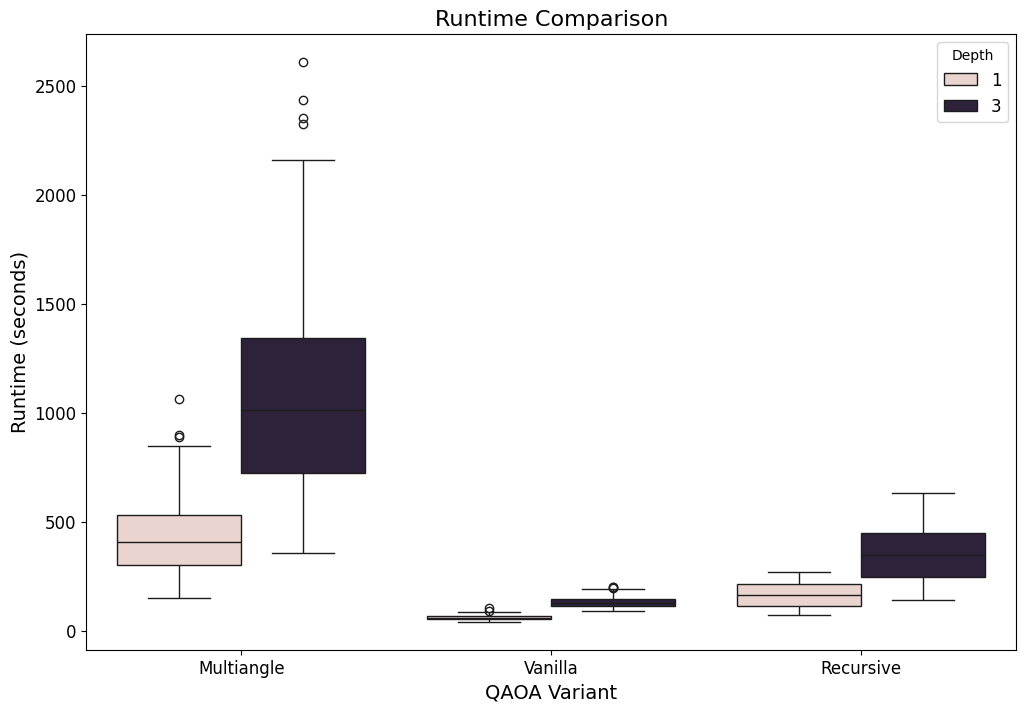

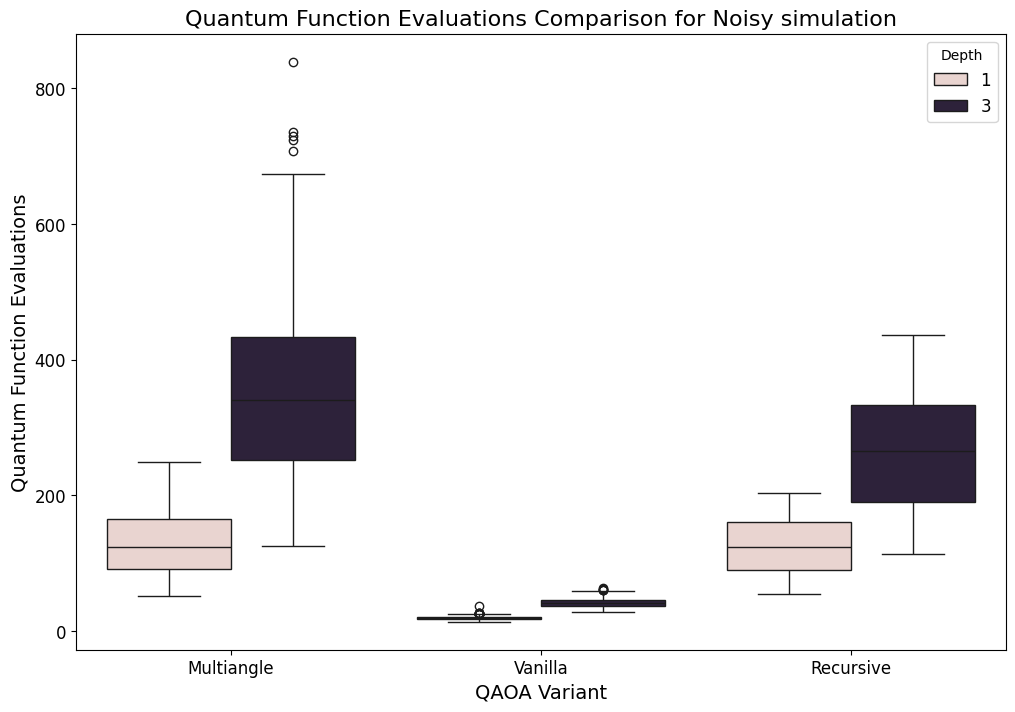

NameError: name 'average_percent_optimal' is not defined

In [52]:
# Filter the DataFrame for the required conditions
filtered_df = combined_df[combined_df['errors']==True]
print(len(filtered_df))
filtered_df['qaoa_variant'] = filtered_df['qaoa_variant'].str.capitalize()


# Plot percent optimal
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='qaoa_variant', y='percent_optimal', hue='depth')
plt.xlabel('QAOA Variant')
plt.ylabel('Optimality gap')
plt.title('Optimality gap Comparison')
plt.legend(title='Depth')
plt.show()

# Plot runtime
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='qaoa_variant', y='time_elapsed', hue='depth')
plt.xlabel('QAOA Variant', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
plt.title('Runtime Comparison', fontsize=16)
plt.legend(title='Depth', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot qfev
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='qaoa_variant', y='quantum_func_evals', hue='depth')
plt.xlabel('QAOA Variant', fontsize=14)
plt.ylabel('Quantum Function Evaluations', fontsize=14)
plt.title('Quantum Function Evaluations Comparison for Noisy simulation', fontsize=16)
plt.legend(title='Depth', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
# Print average percent optimal
print(average_percent_optimal)

# Group by 'qaoa_variant' and 'depth' and calculate the mean of 'time_elapsed'
mean_runtimes = filtered_df.groupby(['qaoa_variant', 'depth'])['time_elapsed'].mean().reset_index()

# Rename the columns for clarity
mean_runtimes.columns = ['QAOA Variant', 'Depth', 'Mean Runtime']

# Display the mean runtimes
print(mean_runtimes)

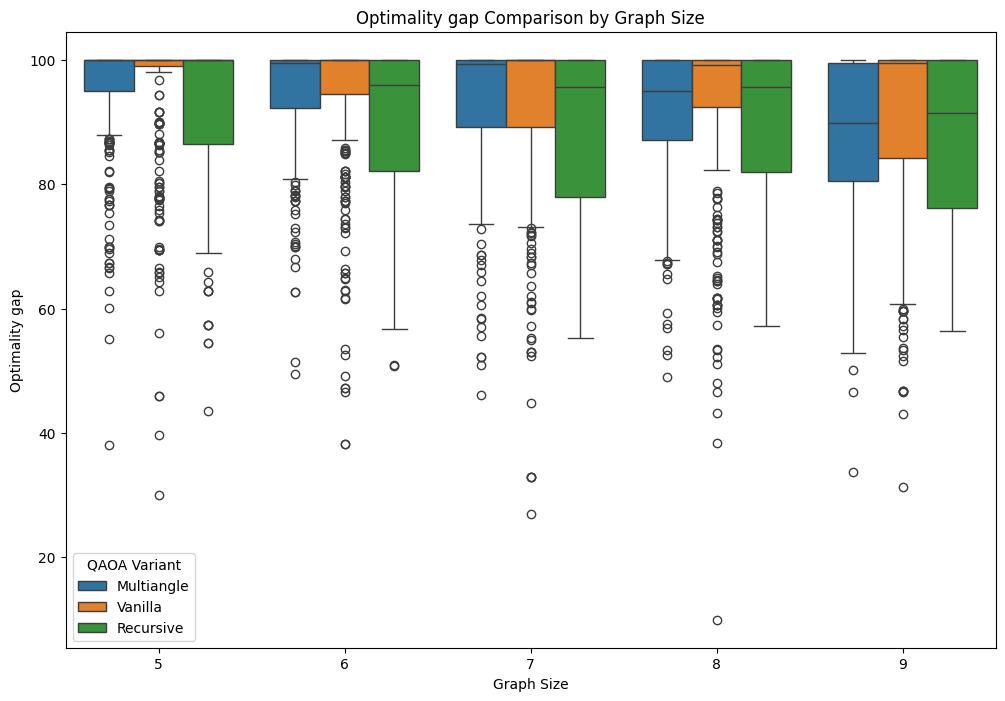

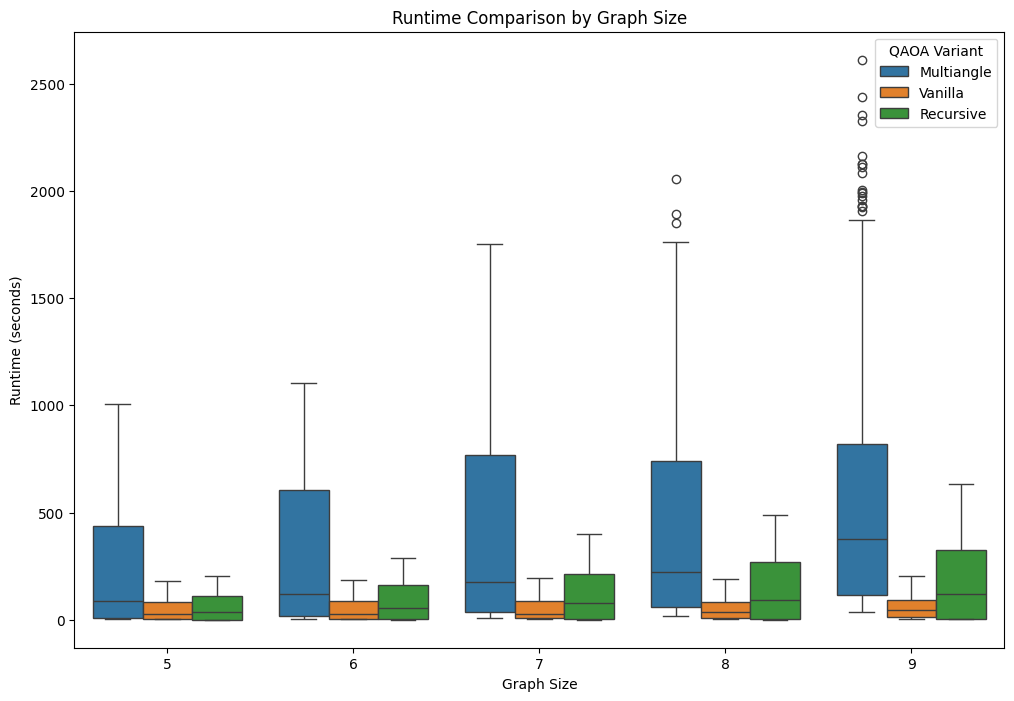

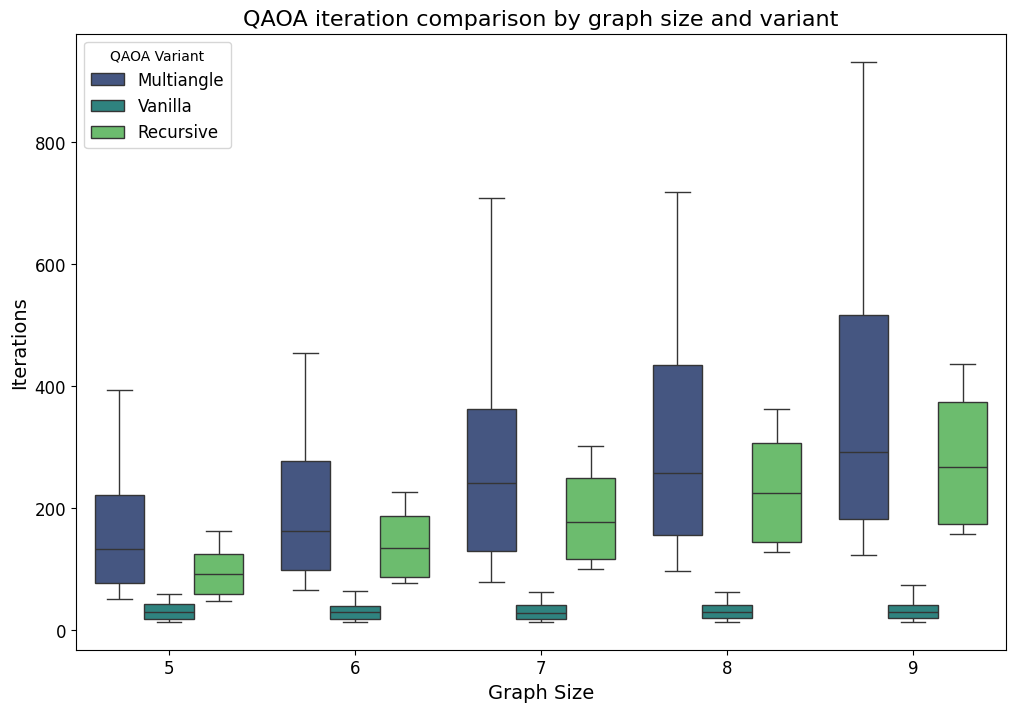

   QAOA Variant  Graph Size  Average Quantum Function Evaluations
0    Multiangle           5                            153.709375
1    Multiangle           6                            191.190625
2    Multiangle           7                            253.496875
3    Multiangle           8                            300.243750
4    Multiangle           9                            357.018750
5     Recursive           5                             92.668750
6     Recursive           6                            138.437500
7     Recursive           7                            185.737500
8     Recursive           8                            229.406250
9     Recursive           9                            277.918750
10      Vanilla           5                             30.971875
11      Vanilla           6                             30.634375
12      Vanilla           7                             31.009375
13      Vanilla           8                             31.306250
14      Va

In [53]:
# Filter the DataFrame for the required conditions
filtered_df = combined_df
filtered_df['qaoa_variant'] = filtered_df['qaoa_variant'].str.capitalize()

# Plot percent optimal
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='graph_size', y='percent_optimal', hue='qaoa_variant')
plt.xlabel('Graph Size')
plt.ylabel('Optimality gap')
plt.title('Optimality gap Comparison by Graph Size')
plt.legend(title='QAOA Variant')
plt.show()

# Plot runtime
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='graph_size', y='time_elapsed', hue='qaoa_variant')
plt.xlabel('Graph Size')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison by Graph Size')
plt.legend(title='QAOA Variant')
plt.show()

# Plot qfev
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='graph_size', y='quantum_func_evals', hue='qaoa_variant', palette='viridis')
plt.xlabel('Graph Size', fontsize=14)
plt.ylabel('Iterations', fontsize=14)
plt.title('QAOA iteration comparison by graph size and variant', fontsize=16)
plt.legend(title='QAOA Variant', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Print average percent optimal
#print(average_percent_optimal)
# Group by 'qaoa_variant' and calculate the mean of 'quantum_func_evals'
# Group by 'qaoa_variant' and 'graph_size' and calculate the mean of 'quantum_func_evals'
average_quantum_func_evals_by_graph_size = combined_df.groupby(['qaoa_variant', 'graph_size'])['quantum_func_evals'].mean().reset_index()

# Rename the columns for clarity
average_quantum_func_evals_by_graph_size.columns = ['QAOA Variant', 'Graph Size', 'Average Quantum Function Evaluations']

# Display the average quantum function evaluations by graph size
print(average_quantum_func_evals_by_graph_size)

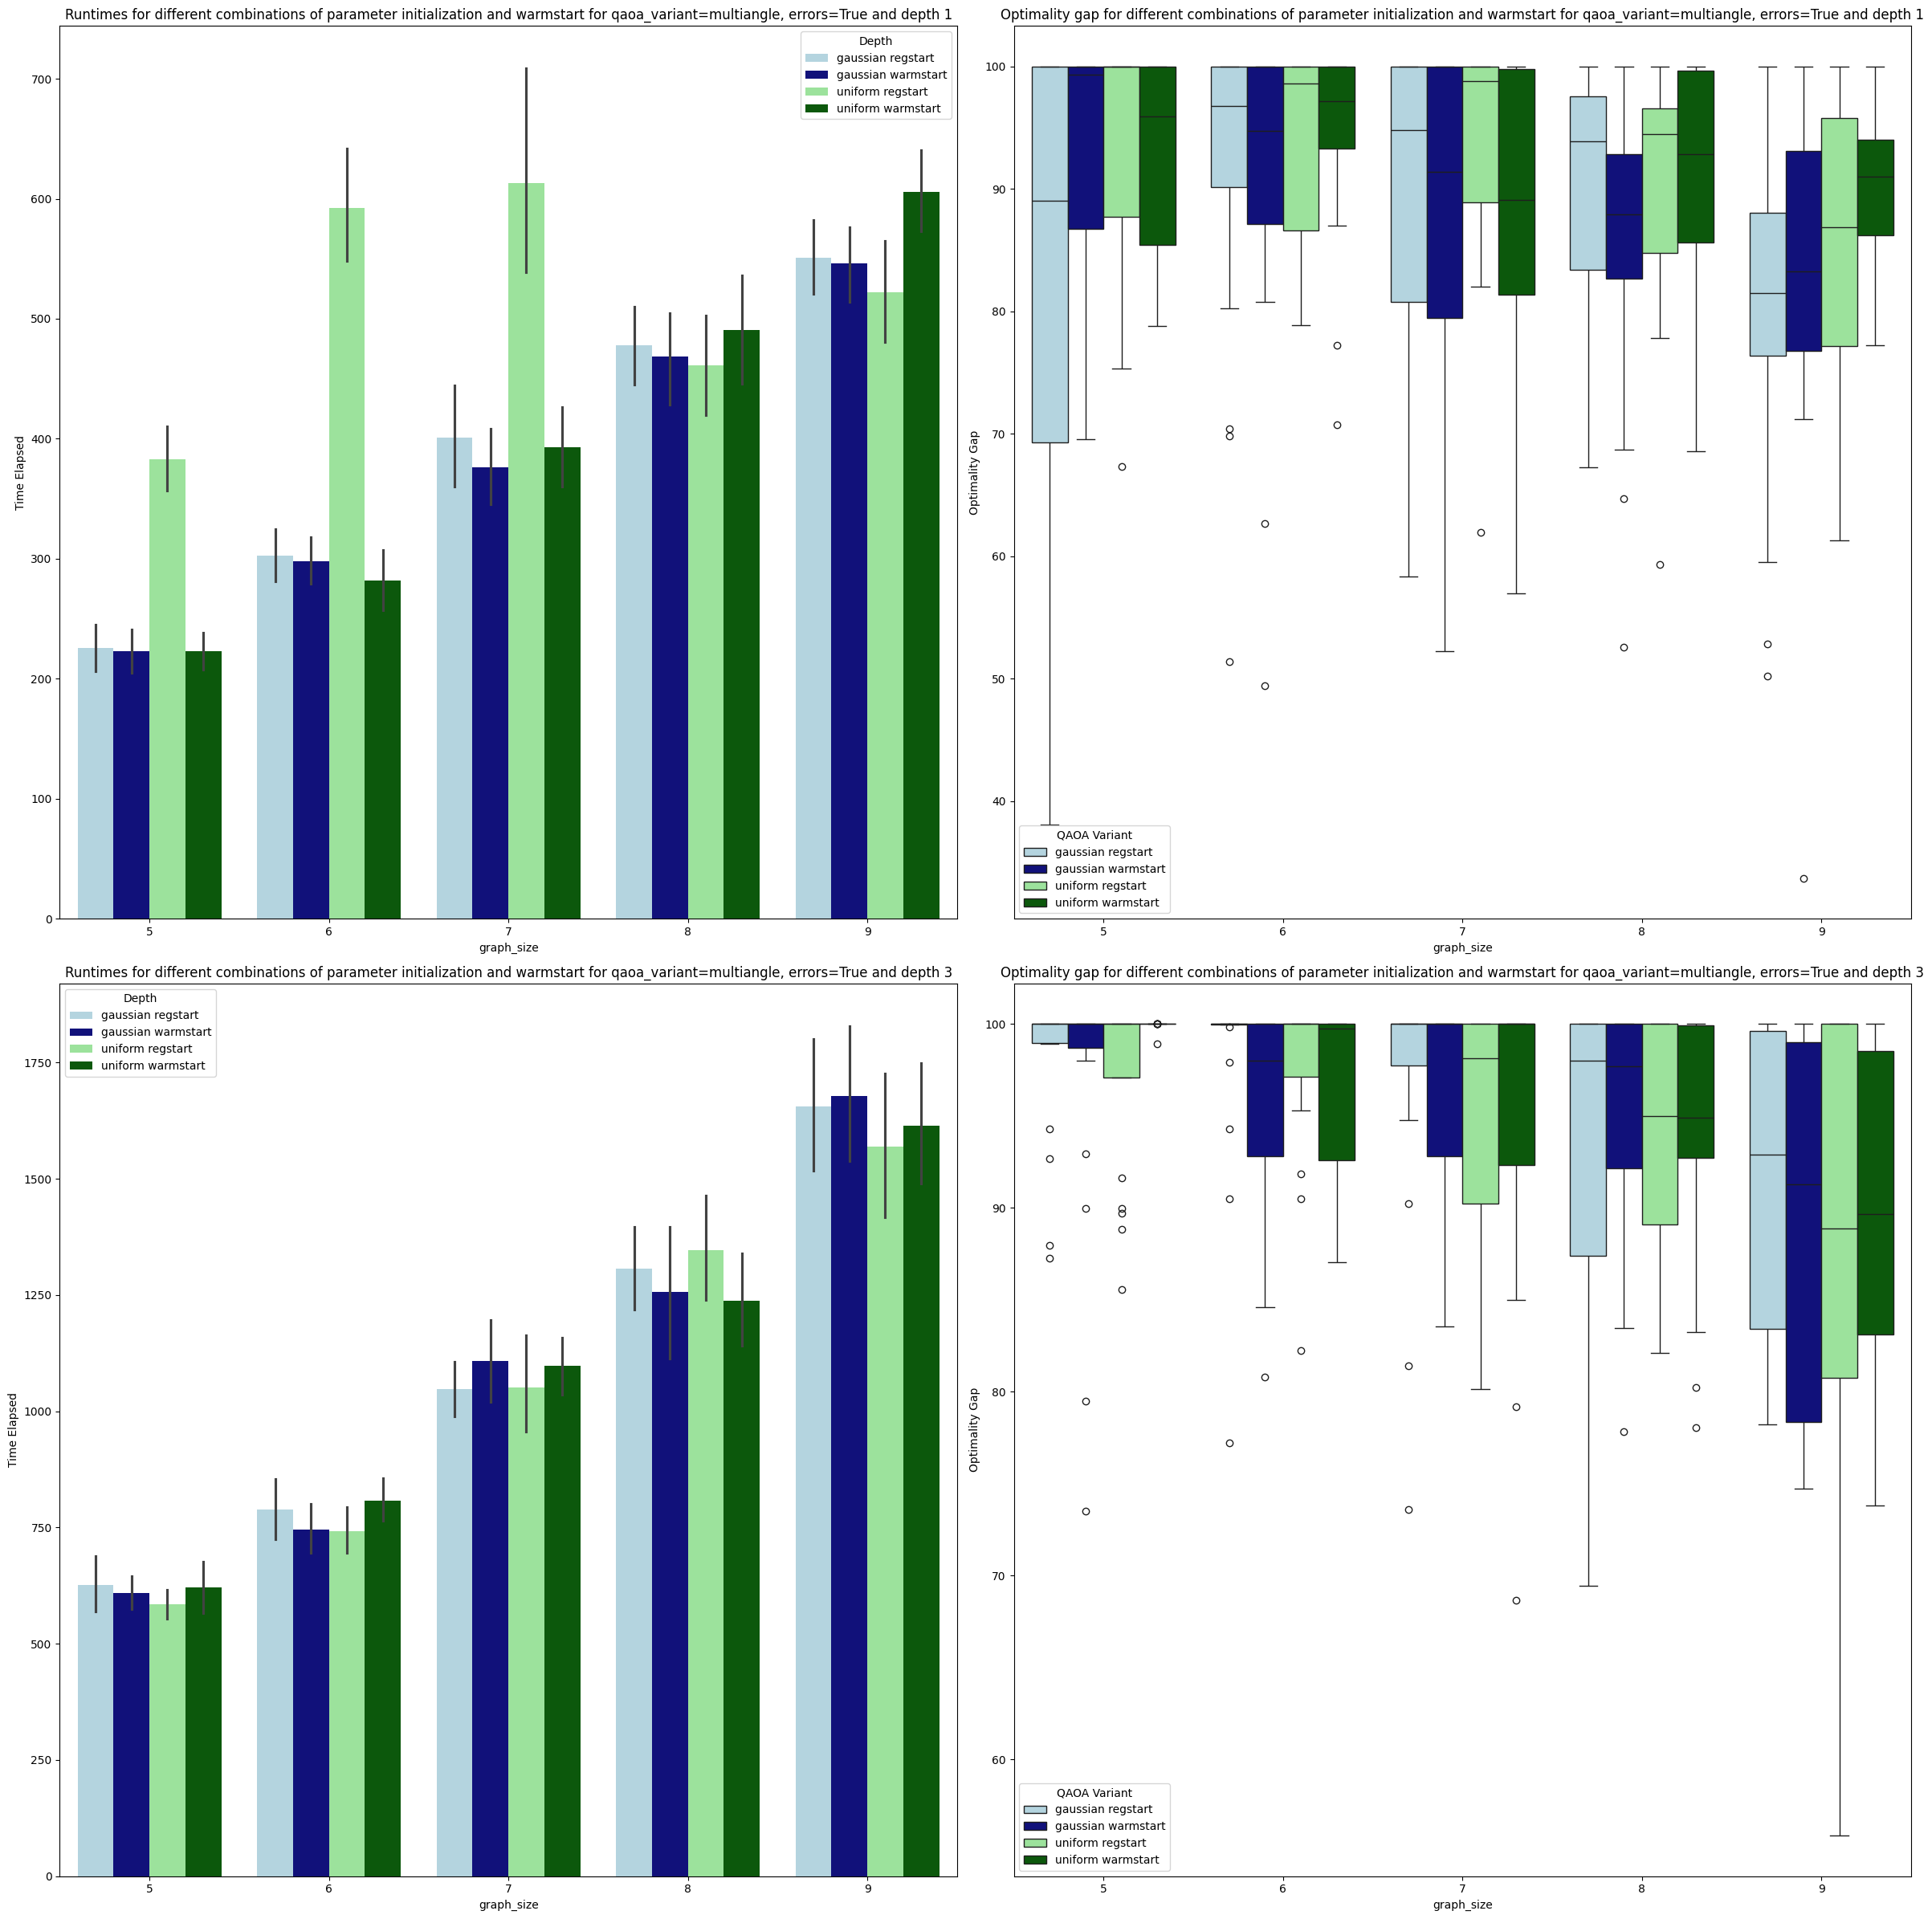

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

def warmstartconv(str):
    return 'warmstart' if str else 'regstart'
# Calculate the percent of optimal solution
combined_df['percent_optimal'] = (combined_df['quantum_obj_value'] / combined_df['classic_value']) * 100

combined_df['identifier'] = combined_df['param_initialization'] + ' '+ combined_df['warm_start'].apply(lambda x: warmstartconv(x)) 

def print_nice(df,filter_dict):
    filtered_df = df
    
    for column, value in filter_dict.items():
        filtered_df = filtered_df[filtered_df[column] == value]
    
    custom_colors = ['#ADD8E6', '#00008B', '#90EE90', '#006400']

    fig, axes = plt.subplots(2, 2, figsize=(24, 24))

    # Filter data for depth = 1
    depth_1_df = filtered_df[filtered_df['depth'] == 1]
    filter_str = ', '.join([f'{key}={value}' for key, value in filter_dict.items()])

    # Third plot
    sns.barplot(data=depth_1_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[0, 0])
    axes[0, 0].set_xlabel('graph_size')
    axes[0, 0].set_ylabel('Time Elapsed')
    axes[0, 0].set_title(f'Runtimes for different combinations of parameter initialization and warmstart for {filter_str} and depth 1')
    axes[0, 0].legend(title='Depth')

    # Fourth plot
    sns.boxplot(data=depth_1_df, x='graph_size', y='percent_optimal', hue='identifier', palette=custom_colors, ax=axes[0, 1])
    axes[0, 1].set_xlabel('graph_size')
    axes[0, 1].set_ylabel('Optimality Gap')
    axes[0, 1].set_title(f'Optimality gap for different combinations of parameter initialization and warmstart for {filter_str} and depth 1')
    axes[0, 1].legend(title='QAOA Variant')

    # Filter data for depth = 3
    depth_3_df = filtered_df[filtered_df['depth'] == 3]

    # Fifth plot
    sns.barplot(data=depth_3_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[1, 0])
    axes[1, 0].set_xlabel('graph_size')
    axes[1, 0].set_ylabel('Time Elapsed')
    axes[1, 0].set_title(f'Runtimes for different combinations of parameter initialization and warmstart for {filter_str} and depth 3')
    axes[1, 0].legend(title='Depth')

    # Sixth plot
    sns.boxplot(data=depth_3_df, x='graph_size', y='percent_optimal', hue='identifier', palette=custom_colors, ax=axes[1, 1])
    axes[1, 1].set_xlabel('graph_size')
    axes[1, 1].set_ylabel('Optimality Gap')
    axes[1, 1].set_title(f'Optimality gap for different combinations of parameter initialization and warmstart for {filter_str} and depth 3')
    axes[1, 1].legend(title='QAOA Variant')

    # Show the plots
    plt.tight_layout()
    plt.show()

print_nice(combined_df, {'qaoa_variant': 'multiangle', 'errors':True})


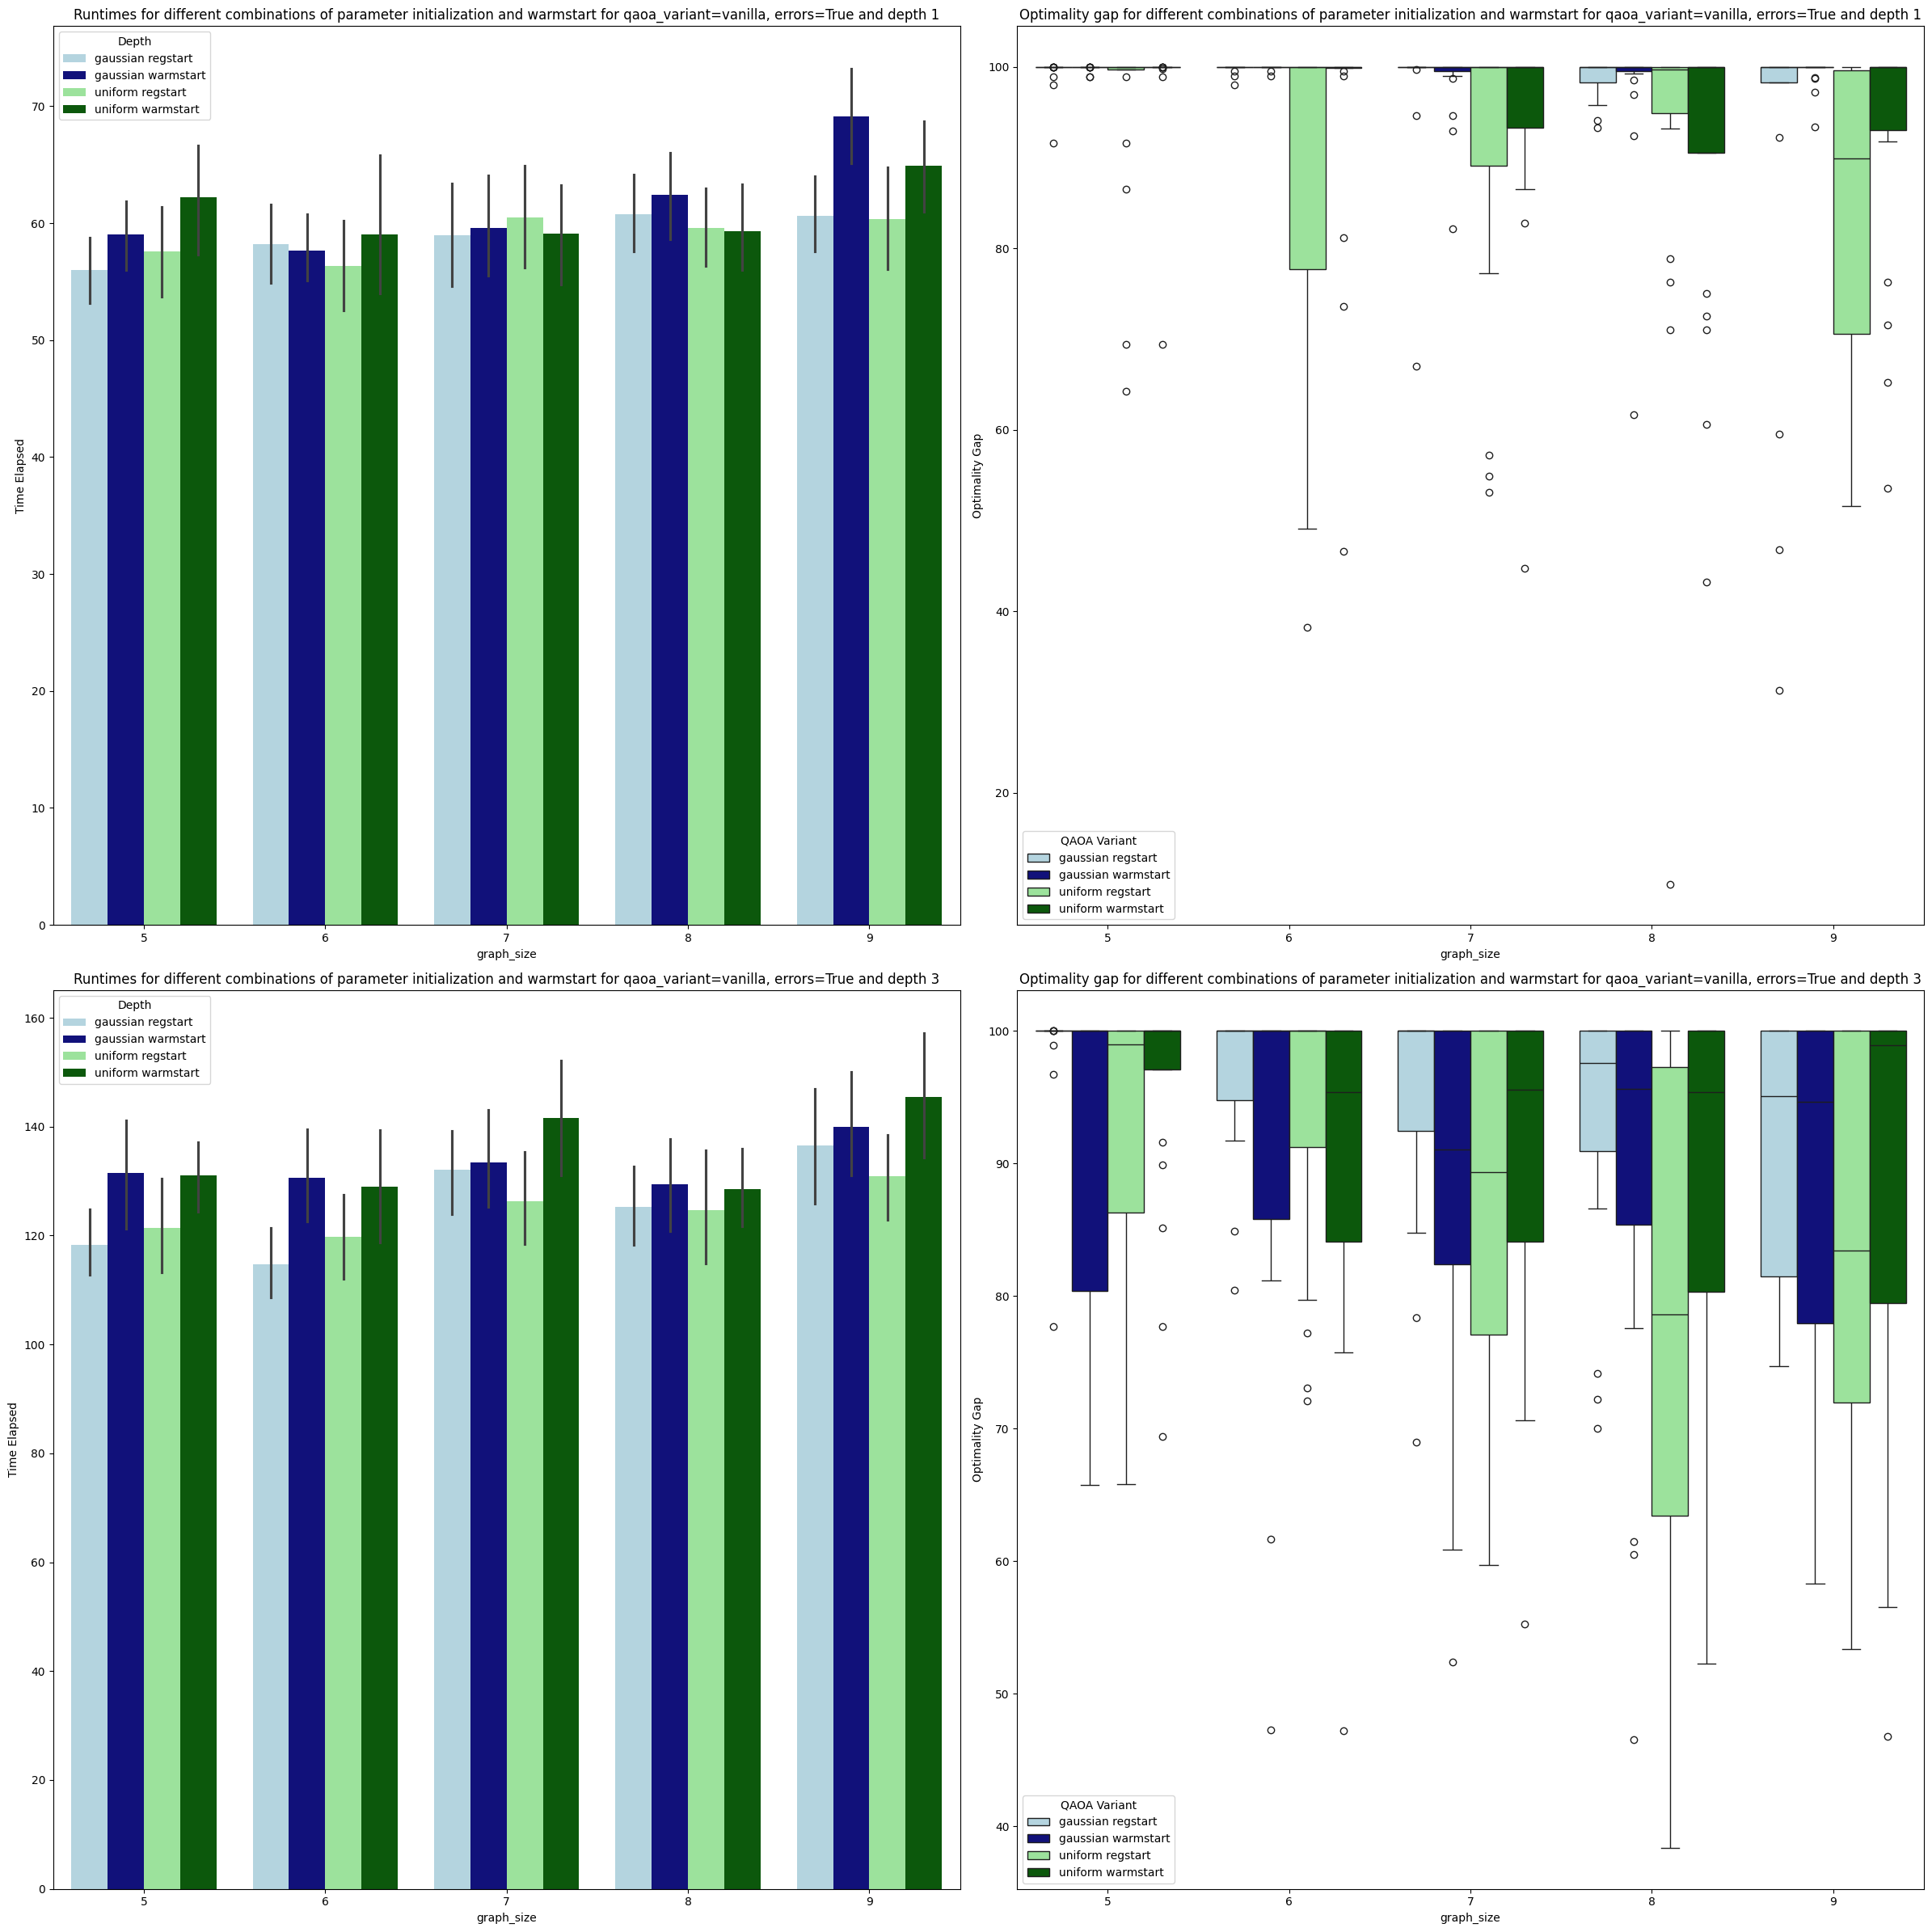

In [20]:
print_nice(combined_df,{'qaoa_variant': 'vanilla', 'errors':True})

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\361261969.py:27: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=depth_1_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[0, 0])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\361261969.py:34: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data=depth_1_df, x='graph_size', y='percent_optimal', hue='identifier', palette=custom_colors, ax=axes[0, 1])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\361261969.py:44: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=depth_3_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[1, 0])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\361261969.py:51: UserWarning: The palette list has more values (4) than needed (2), which

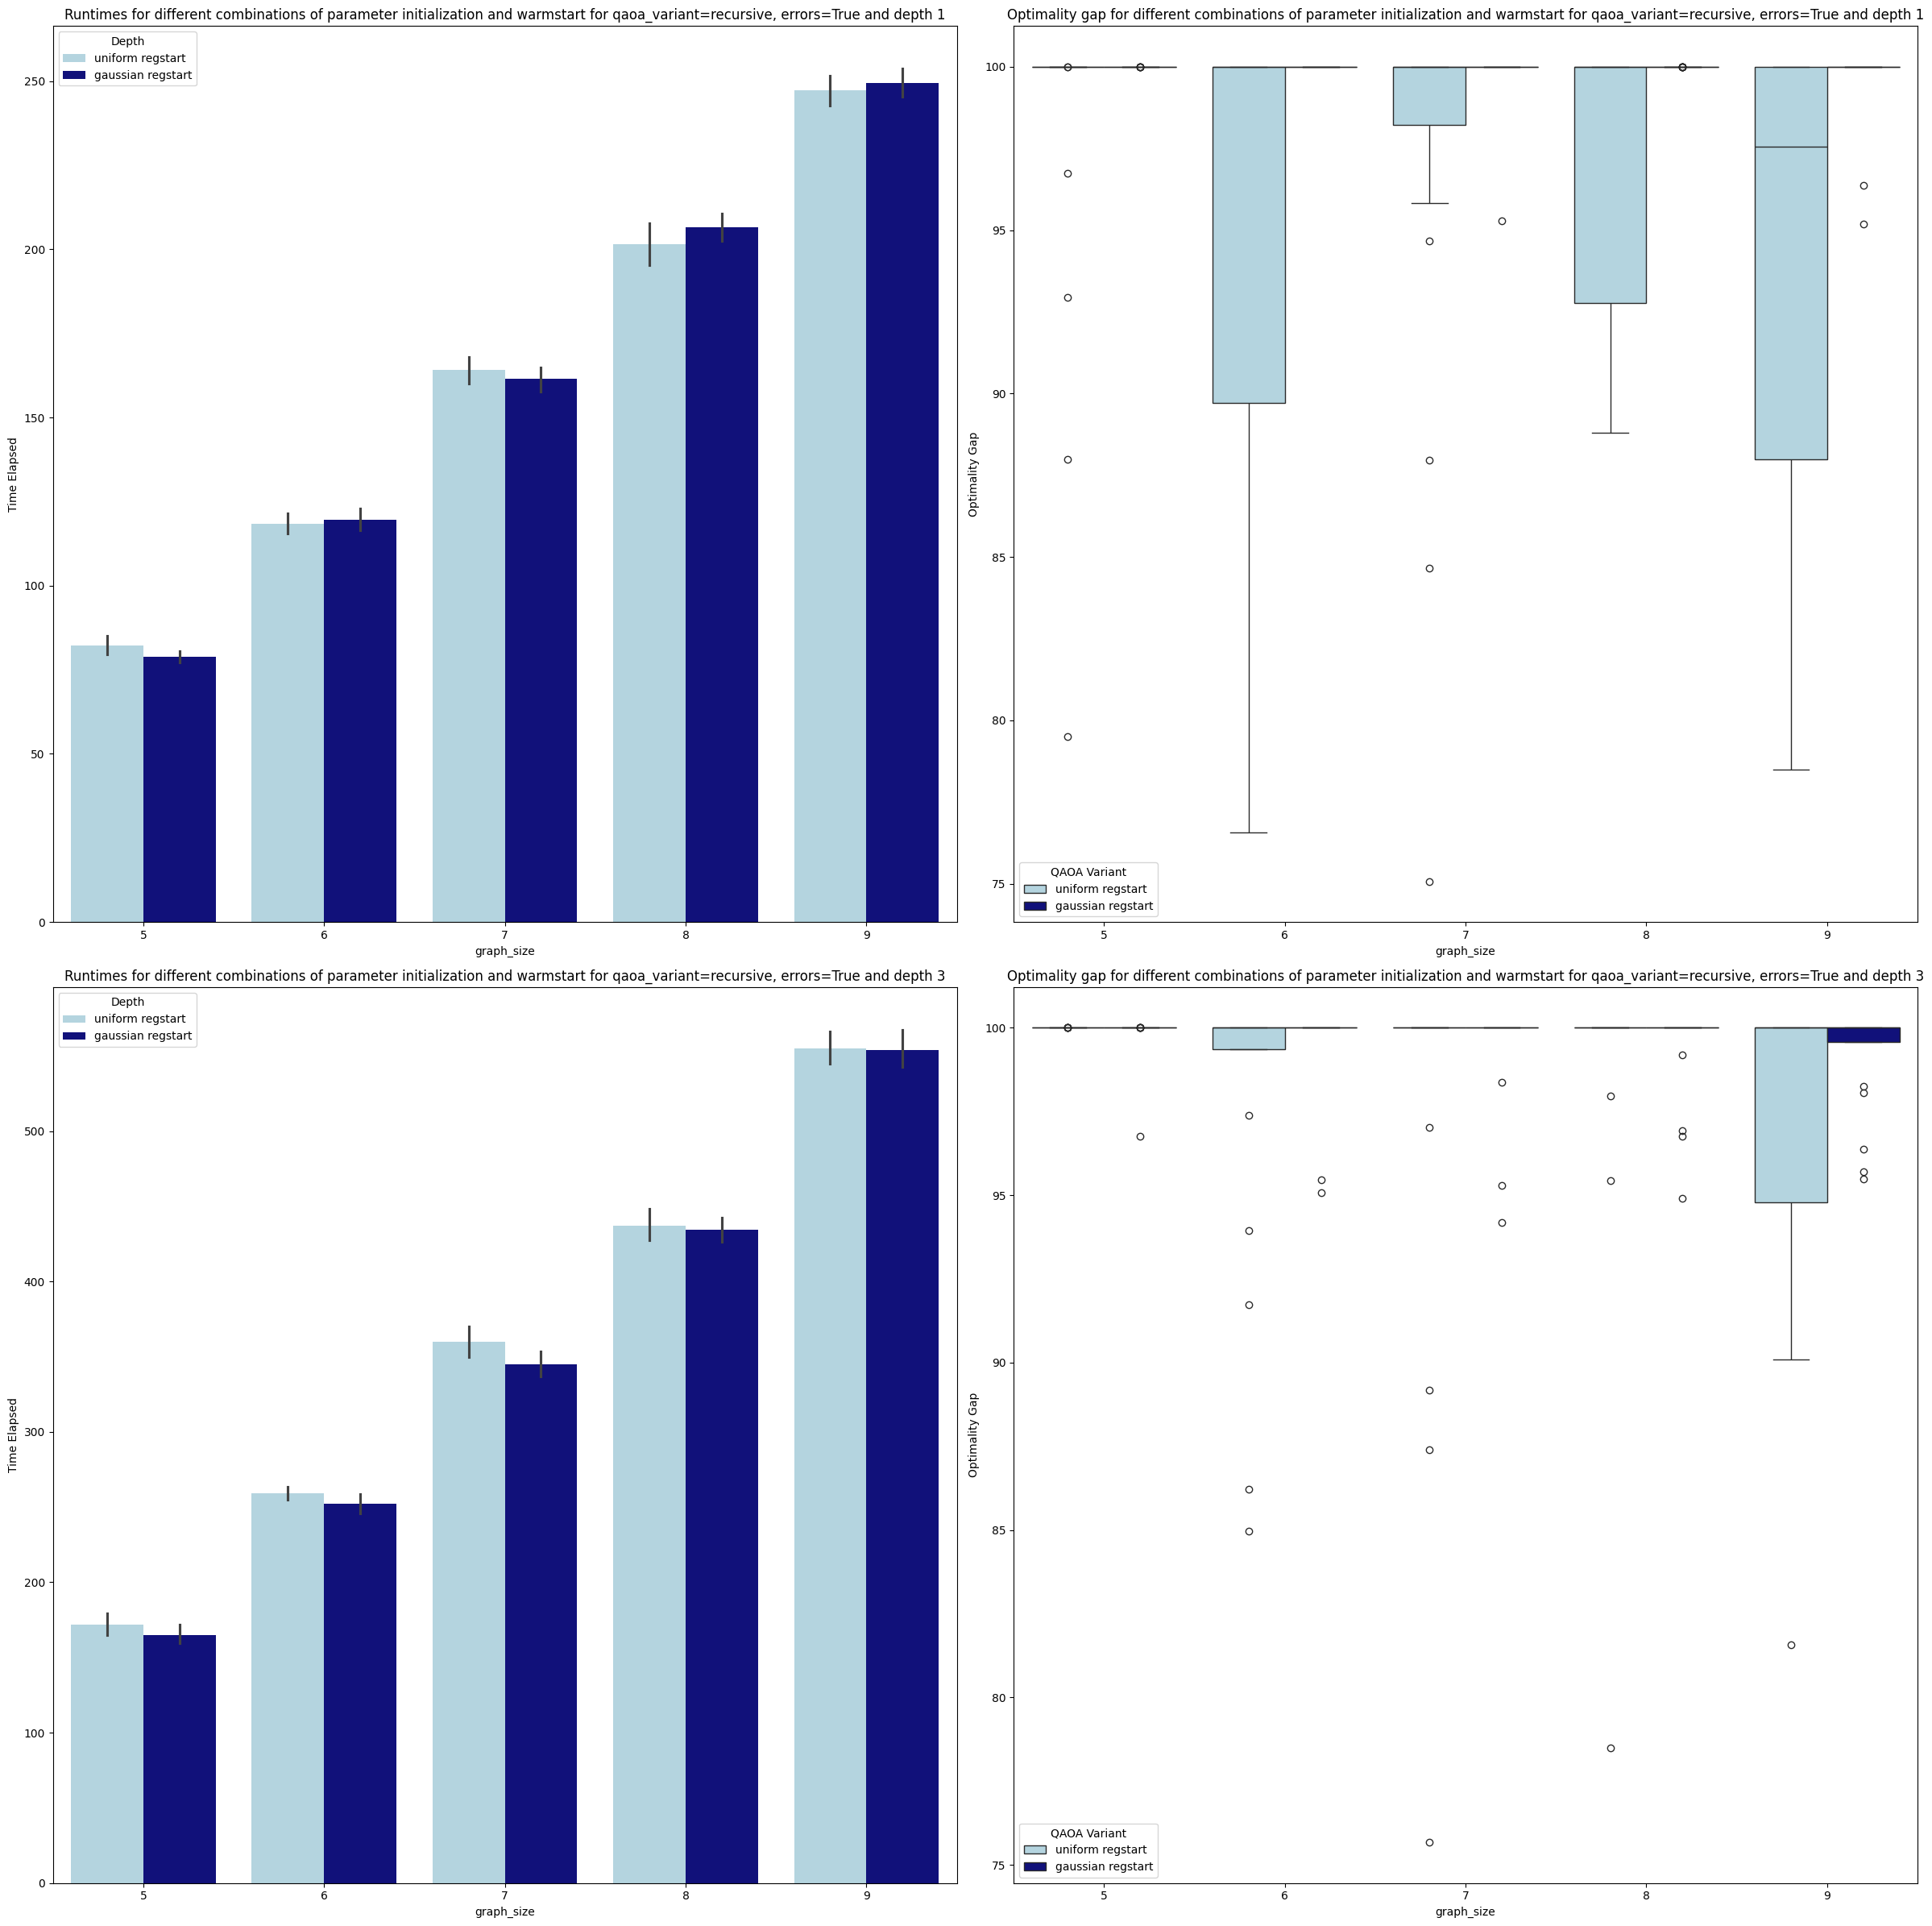

In [21]:
print_nice(combined_df, {'qaoa_variant': 'recursive', 'errors':True})

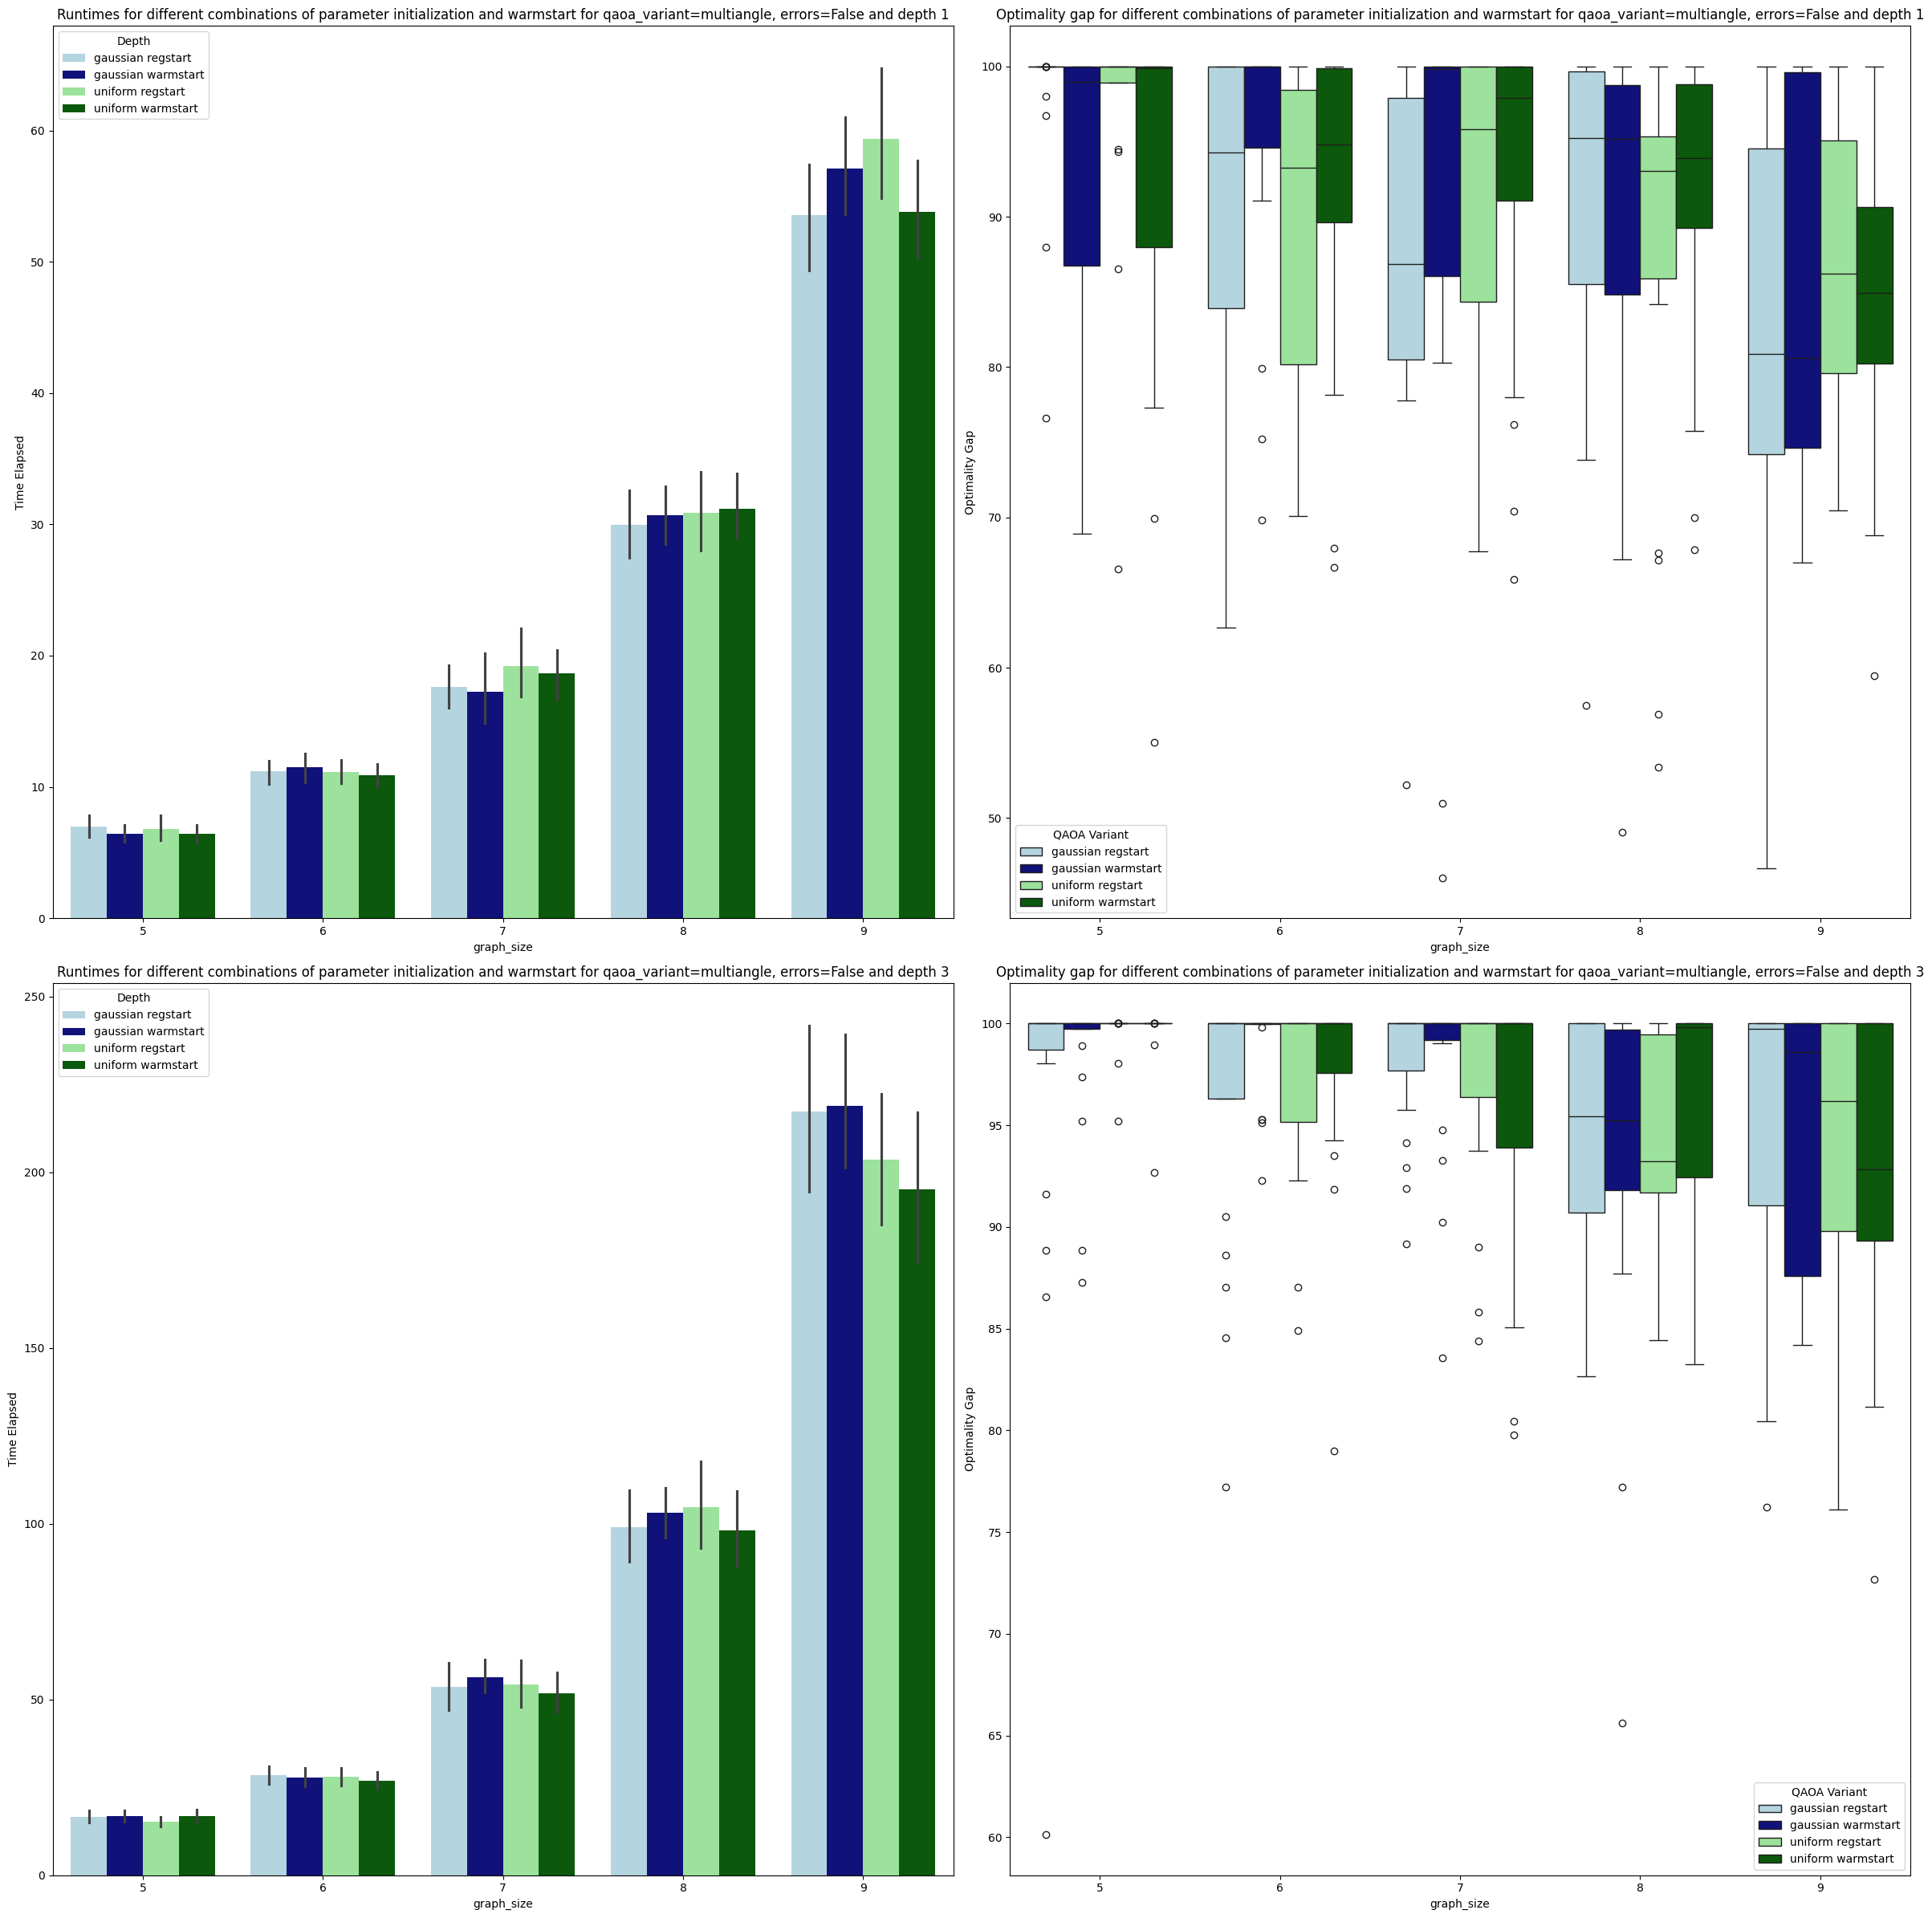

In [22]:
print_nice(combined_df,{'qaoa_variant': 'multiangle', 'errors':False})

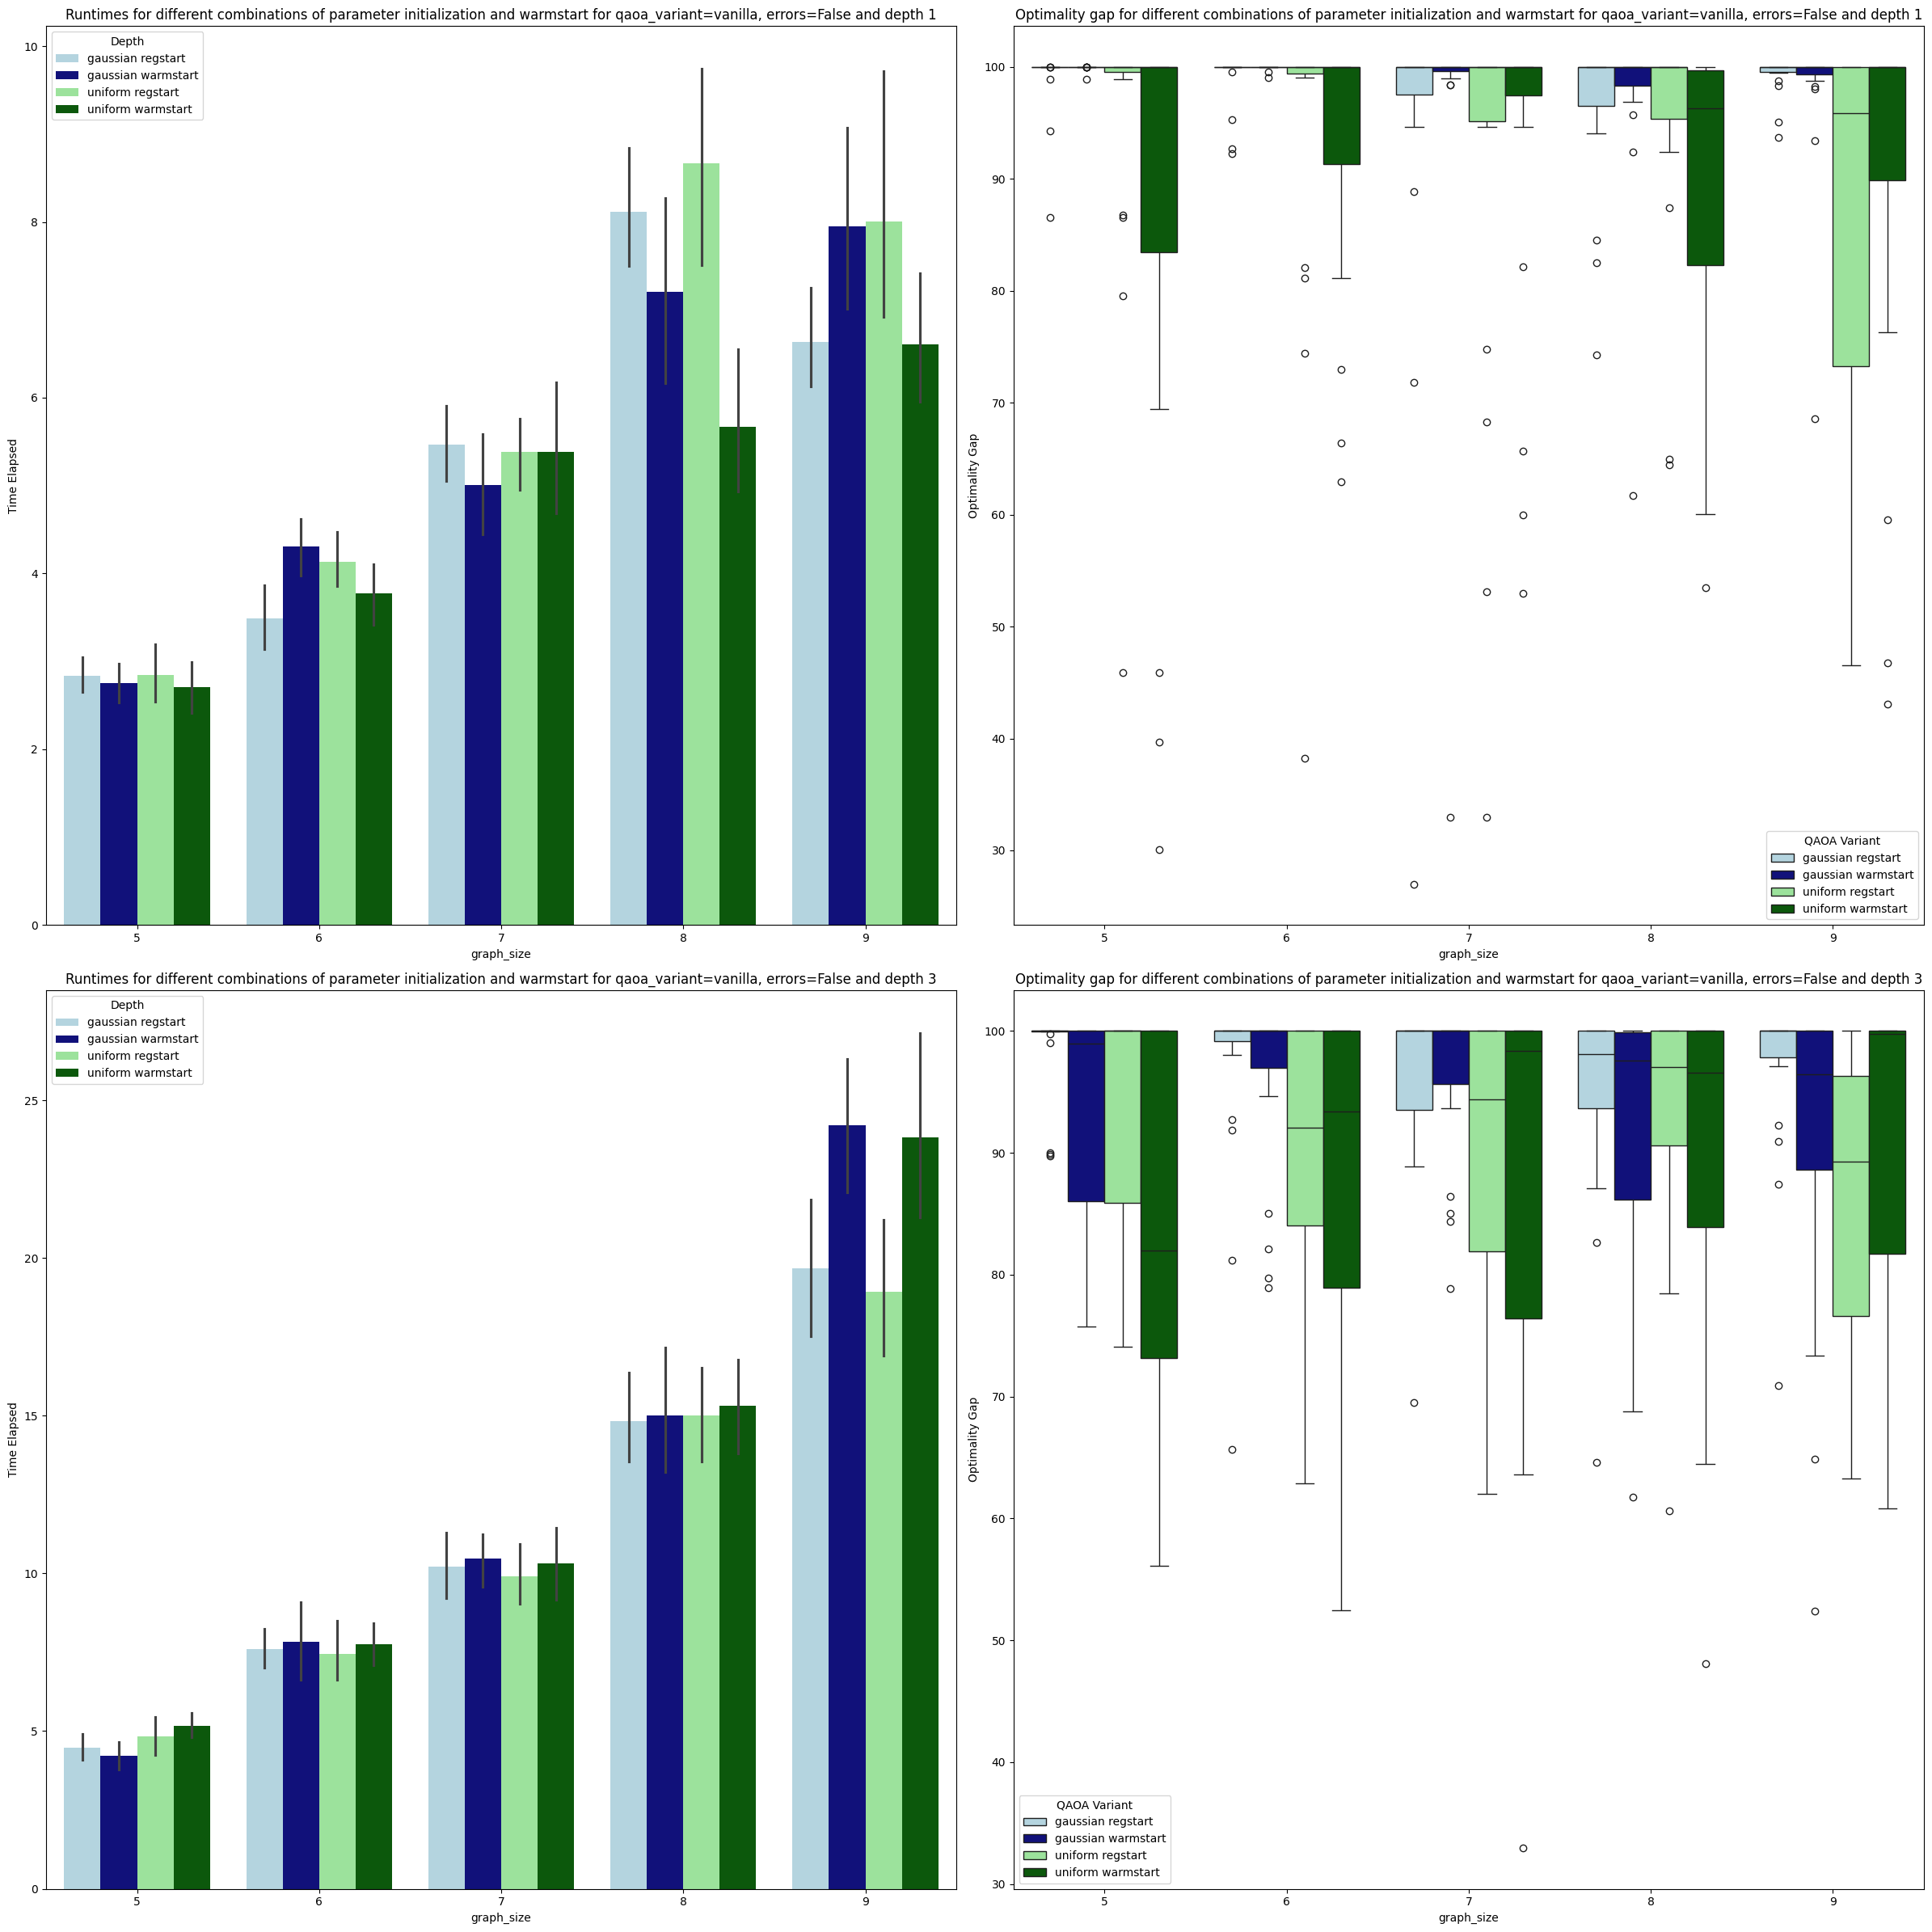

In [23]:
print_nice(combined_df,{'qaoa_variant': 'vanilla', 'errors':False})

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\361261969.py:27: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=depth_1_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[0, 0])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\361261969.py:34: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data=depth_1_df, x='graph_size', y='percent_optimal', hue='identifier', palette=custom_colors, ax=axes[0, 1])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\361261969.py:44: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=depth_3_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[1, 0])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\361261969.py:51: UserWarning: The palette list has more values (4) than needed (2), which

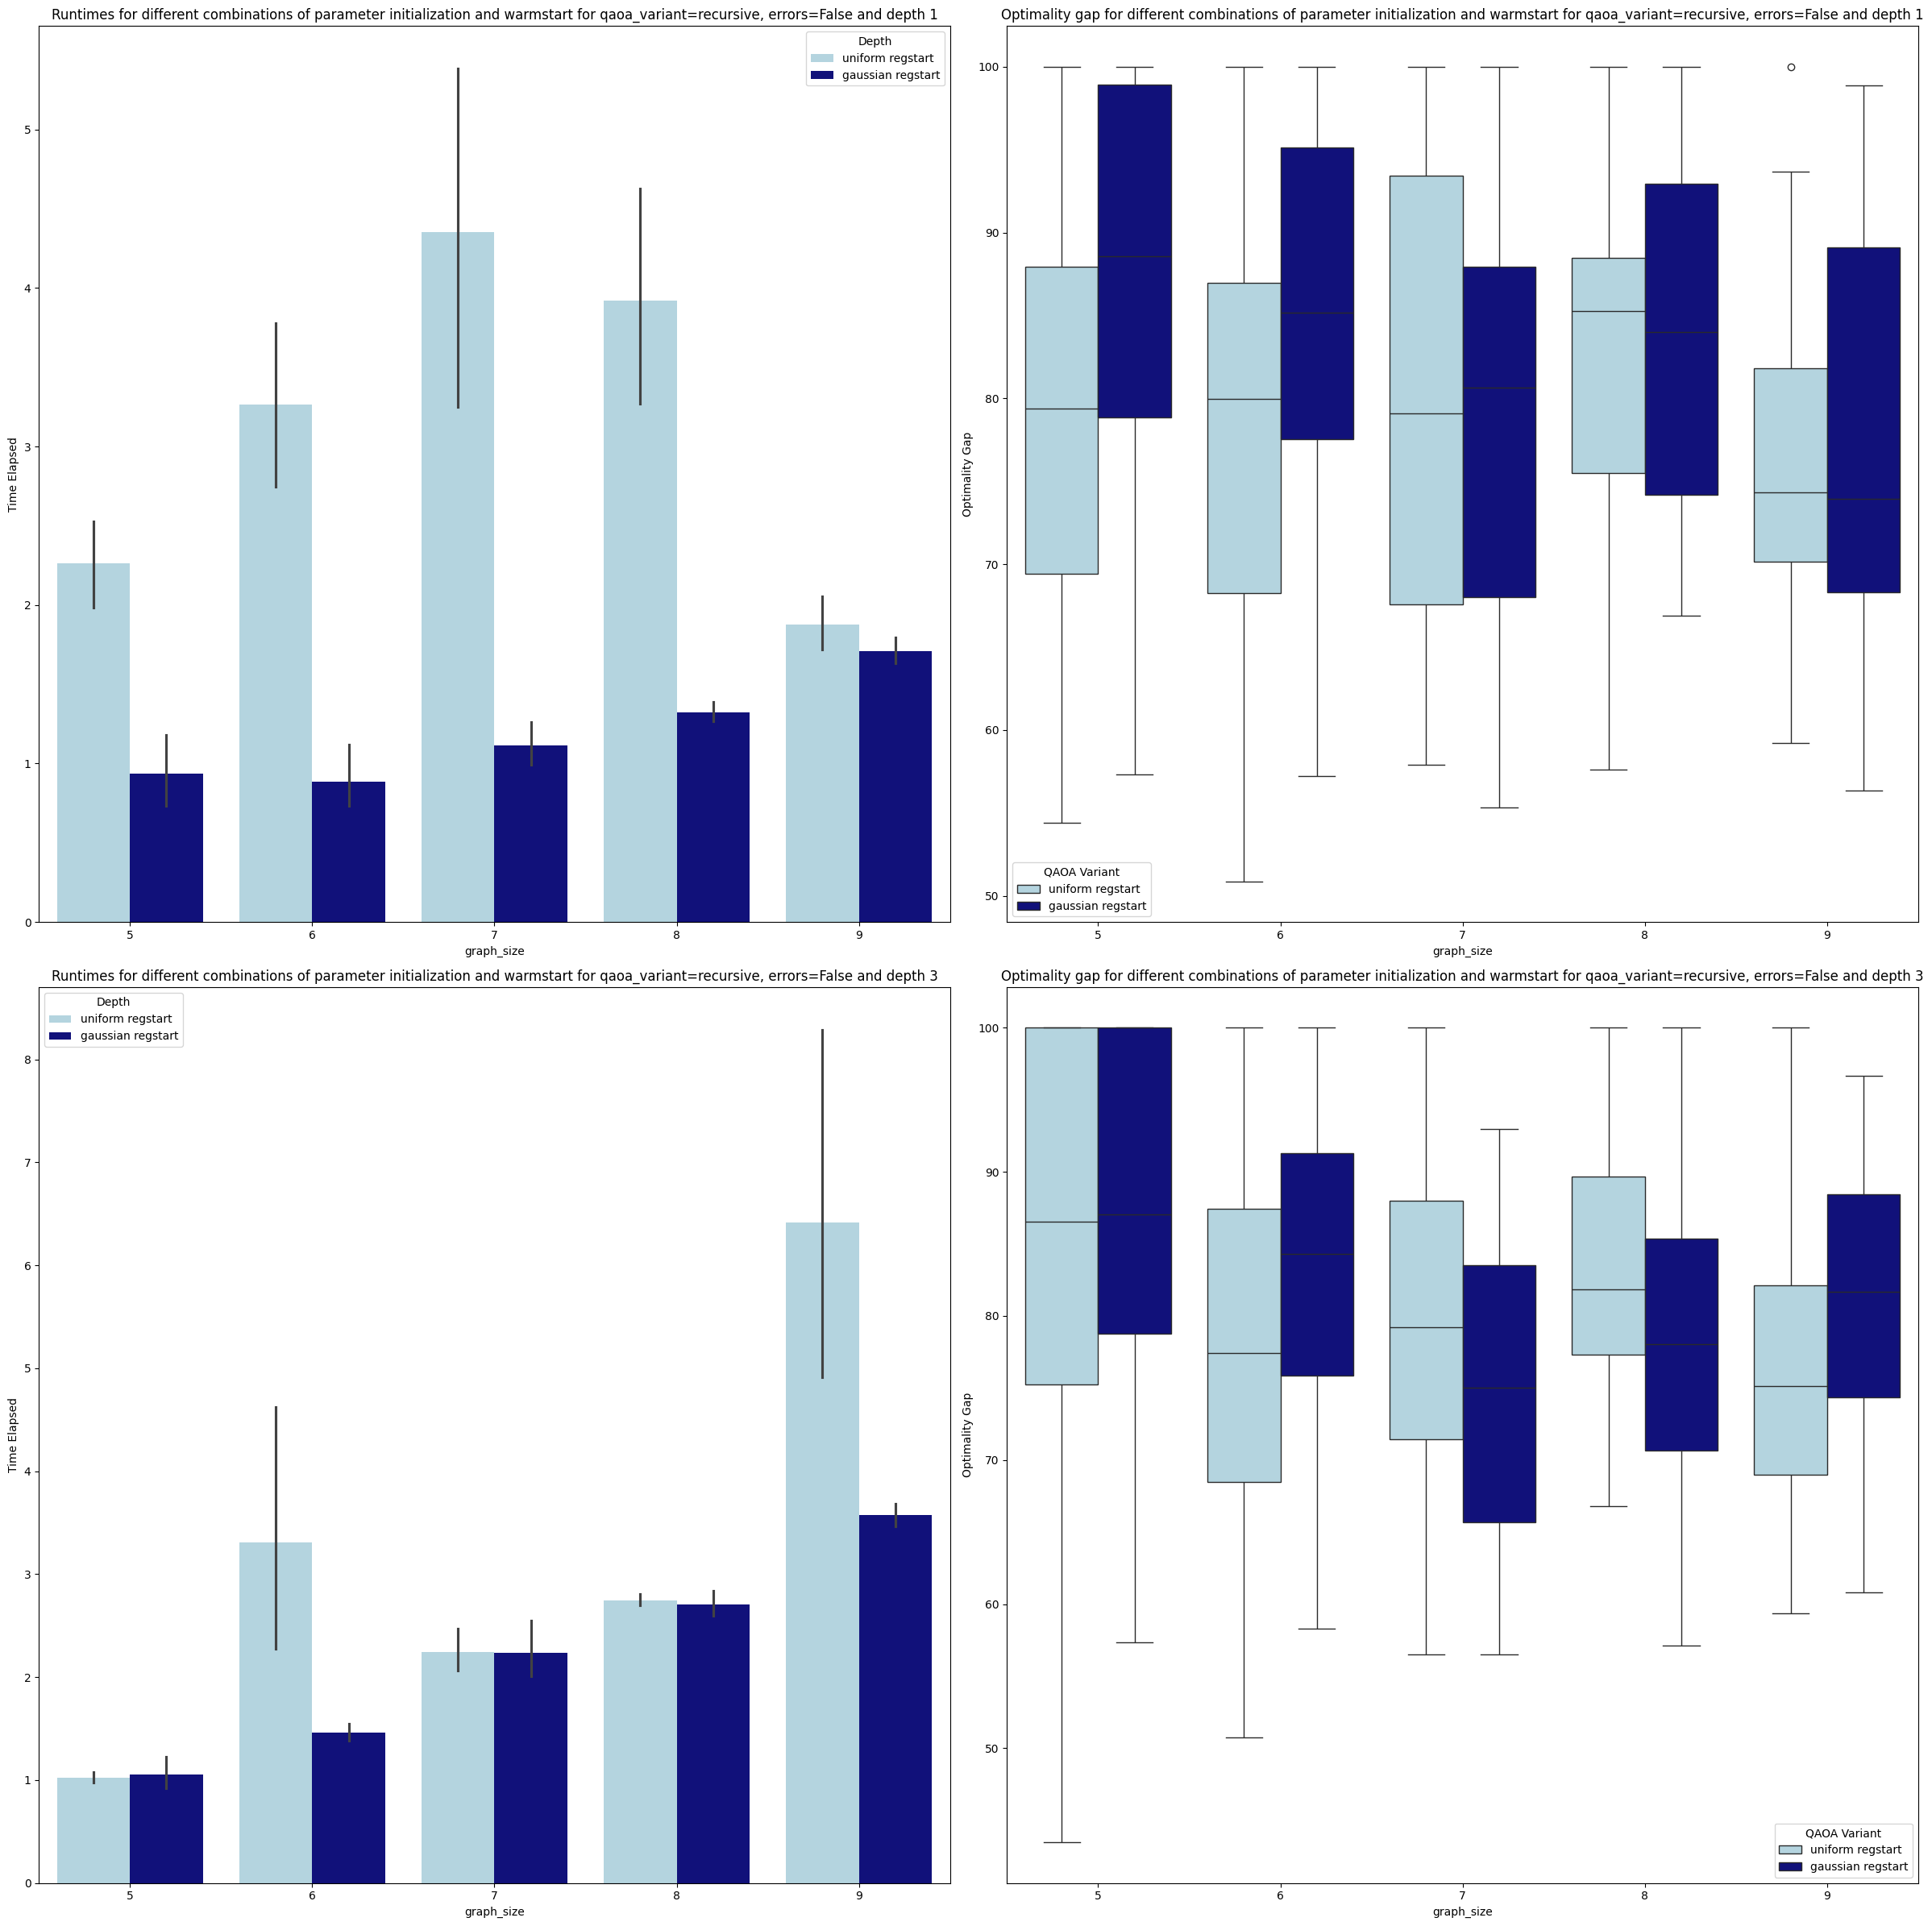

In [24]:
print_nice(combined_df, {'qaoa_variant': 'recursive', 'errors':False})

In [31]:
# Group by 'identifier' and calculate the mean of 'percent_optimal'
error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'vanilla')]

error_df['identifier'] = 'Depth ' + error_df['depth'].apply(lambda x: str(x))+ ', ' + error_df['param_initialization'] 

aggregate_percent_optimal = error_df.groupby('identifier')['percent_optimal'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'Average Percent Optimal']

# Display the aggregate table
print('Vanilla',aggregate_percent_optimal)


error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'multiangle')]
error_df['identifier'] = 'Depth ' + error_df['depth'].apply(lambda x: str(x))+ ', ' + error_df['param_initialization'] 

aggregate_percent_optimal = error_df.groupby('identifier')['percent_optimal'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'Average Percent Optimal']

# Display the aggregate table
print('multiangle', aggregate_percent_optimal)

error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'recursive')]
error_df['identifier'] = 'Depth ' + error_df['depth'].apply(lambda x: str(x))+ ', ' + error_df['param_initialization'] 

aggregate_percent_optimal = error_df.groupby('identifier')['percent_optimal'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'Average Percent Optimal']

# Display the aggregate table
print('recursive', aggregate_percent_optimal)

Vanilla           Identifier  Average Percent Optimal
0  Depth 1, gaussian                98.235570
1   Depth 1, uniform                91.954684
2  Depth 3, gaussian                92.313755
3   Depth 3, uniform                88.433101
multiangle           Identifier  Average Percent Optimal
0  Depth 1, gaussian                87.275204
1   Depth 1, uniform                91.131512
2  Depth 3, gaussian                94.995528
3   Depth 3, uniform                94.611366
recursive           Identifier  Average Percent Optimal
0  Depth 1, gaussian                99.868703
1   Depth 1, uniform                96.129340
2  Depth 3, gaussian                99.467769
3   Depth 3, uniform                98.089130


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\2629133383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = 'Depth ' + error_df['depth'].apply(lambda x: str(x))+ ', ' + error_df['param_initialization']
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\2629133383.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = 'Depth ' + error_df['depth'].apply(lambda x: str(x))+ ', ' + error_df['param_initialization']
C:\Users\torbjsme\AppData\Local\Temp\ipyk

In [54]:
# Group by 'identifier' and calculate the mean of 'percent_optimal'
error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'vanilla')]

error_df['identifier'] = error_df['param_initialization'] + error_df['depth'].apply(lambda x: str(x))

aggregate_percent_optimal = error_df.groupby('identifier')['quantum_func_evals'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'quantum_func_evals']

# Display the aggregate table
print('Vanilla',aggregate_percent_optimal)


error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'multiangle')]
error_df['identifier'] = error_df['param_initialization'] + error_df['depth'].apply(lambda x: str(x))


aggregate_percent_optimal = error_df.groupby('identifier')['quantum_func_evals'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'quantum_func_evals']

# Display the aggregate table
print('multiangle', aggregate_percent_optimal)

error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'recursive')]
error_df['identifier'] = error_df['param_initialization'] + error_df['depth'].apply(lambda x: str(x))


aggregate_percent_optimal = error_df.groupby('identifier')['quantum_func_evals'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'quantum_func_evals']

# Display the aggregate table
print('recursive', aggregate_percent_optimal)

Vanilla   Identifier  quantum_func_evals
0  gaussian1              19.700
1  gaussian3              41.675
2   uniform1              19.610
3   uniform3              41.875
multiangle   Identifier  quantum_func_evals
0  gaussian1             129.790
1  gaussian3             359.225
2   uniform1             129.315
3   uniform3             354.255
recursive   Identifier  quantum_func_evals
0  gaussian1              123.92
1  gaussian3              266.04
2   uniform1              123.70
3   uniform3              266.86


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\766620442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = error_df['param_initialization'] + error_df['depth'].apply(lambda x: str(x))
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\766620442.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = error_df['param_initialization'] + error_df['depth'].apply(lambda x: str(x))
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_36312\766620442.py:28: Setting